# <font color=#219ebc>Recommandation de films - Nettoyage </font>

# Sommaire
* [Configuration](#Configuration)
* [Chargement des données](#Chargement-des-donnees)
* [Nettoyage](#Nettoyage)
    * [Valeurs manquantes](#Valeurs-manquantes)
    * [Dedoublonnage](#Dedoublonnage)
    * [Préparation des données](#Preparation-des-donnees)
    * [Binarisation](#Binarisation)
        * [Genres](#Genres)
        * [Intrigues](#Intrigues)
    * [Boxplots](#Boxplots)
    * [Histogrammes](#Histogrammes)
    * [Correlations](#Correlations)
* [Ecriture des données](#Ecriture-des-donnees)

## <font color=#fb8500>Configuration</font>

On configure l'affichage de matplotlib en utilisant seaborn, cela nous permettra d'avoir un joli affichage et de profiter des performances de matplotlib

In [1]:
import matplotlib as mplt

import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})

mplt.font_manager._rebuild()

## <font color=#fb8500>Chargement des donnees</font>

In [2]:
import time
start=time.time()

In [3]:
import pandas as pd

df=pd.read_csv("../Dataset/movie_metadata.csv",sep=",",encoding="utf-8")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## <font color=#fb8500>Nettoyage</font>

### <font color=#ffb703>Valeurs manquantes</font>

In [5]:
sNombreValeursManquantes=df.isna().sum()
sNombreValeursManquantes

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
import numpy as np

nombreIndividus=len(df)
sPourcentageValeursManquantes=(np.round(sNombreValeursManquantes/nombreIndividus*100,2)).sort_values()
sPourcentageValeursManquantes

cast_total_facebook_likes     0.00
imdb_score                    0.00
movie_imdb_link               0.00
num_voted_users               0.00
movie_title                   0.00
genres                        0.00
movie_facebook_likes          0.00
country                       0.10
actor_1_facebook_likes        0.14
actor_1_name                  0.14
language                      0.24
actor_2_facebook_likes        0.26
actor_2_name                  0.26
facenumber_in_poster          0.26
duration                      0.30
color                         0.38
num_user_for_reviews          0.42
actor_3_facebook_likes        0.46
actor_3_name                  0.46
num_critic_for_reviews        0.99
director_facebook_likes       2.06
director_name                 2.06
title_year                    2.14
plot_keywords                 3.03
content_rating                6.01
aspect_ratio                  6.52
budget                        9.76
gross                        17.53
dtype: float64

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


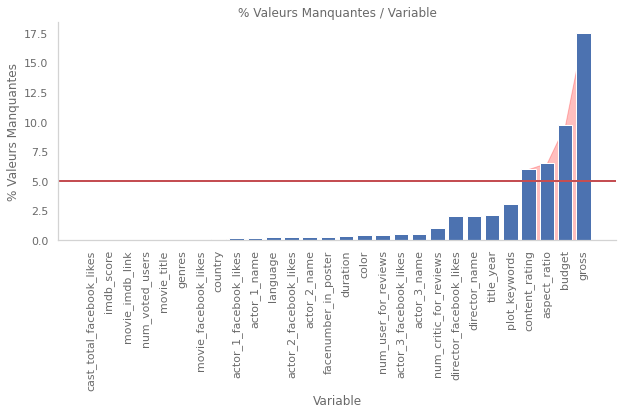

In [7]:
from matplotlib import pyplot as plt
limiteValeursManquantes=5
# taille du graphique
#plt.rcParams['font.size'] = '100.0'
plt.rcParams["figure.figsize"] = (10,4)
# bar chart
plt.bar(sPourcentageValeursManquantes.index,sPourcentageValeursManquantes)
# ligne limite des 6% de valeurs manquantes
plt.axhline(limiteValeursManquantes, color='r',lw=2)
plt.fill_between(sPourcentageValeursManquantes.index,sPourcentageValeursManquantes,where=sPourcentageValeursManquantes>limiteValeursManquantes,color="red",alpha=.25)

# rotation à la verticale des libelles
plt.xticks(rotation=90)

# Titre et libelles
plt.title('% Valeurs Manquantes / Variable')
plt.xlabel('Variable')
plt.ylabel('% Valeurs Manquantes')

plt.show()

Les variables *gross (CA brut)* et *budget* sont celles présentant le plus de variables manquantes.\
Cependant, elles ont au plus que moins de 20% de valeurs manquantes, et 80% de valeurs qui peuvent être utiles pour caracteriser un film => on choisit de les garder pour la suite.

In [8]:
# identification des colonnes numériques et qualitatives
colonnesQuantitatives=df.select_dtypes(np.number).columns.tolist()
colonnesQualitatives=df.select_dtypes('O').columns.tolist()

### <font color=#ffb703>Dedoublonnage</font>

In [9]:
# Avant dédoublonnage
pd.set_option('display.min_rows', 12)
(df.groupby(['movie_title','director_name']).size().reset_index(name='count')).sort_values(by='count',ascending=False)

,movie_title,director_name,count
489,Ben-Hur,Timur Bekmambetov,3
1558,Halloween,John Carpenter,3
1679,Home,Tim Johnson,3
4602,Victor Frankenstein,Paul McGuigan,3
2618,Pan,Joe Wright,3
1988,King Kong,Peter Jackson,3
...,...,...,...
1632,Hereafter,Clint Eastwood,1
1631,Here on Earth,Mark Piznarski,1
1630,Here Comes the Boom,Frank Coraci,1


In [10]:
# identification(masque) des lignes en doublons sur le couple film/realisateur
maskDuplicates=df.duplicated(subset=['movie_title','director_name'])
dfUnique=df[~maskDuplicates]

In [11]:
# Après dédoublonnage
pd.set_option('display.min_rows', 10)
(dfUnique.groupby(['movie_title','director_name']).size().reset_index(name='count')).sort_values(by='count',ascending=False)

,movie_title,director_name,count
0,#Horror,Tara Subkoff,1
3218,Spider-Man,Sam Raimi,1
3216,Spider-Man 2,Sam Raimi,1
3215,Spice World,Bob Spiers,1
3214,Sphinx,Franklin J. Schaffner,1
...,...,...,...
1605,He Got Game,Spike Lee,1
1604,Haywire,Steven Soderbergh,1
1603,Hayride,Terron R. Parsons,1
1602,Hav Plenty,Christopher Scott Cherot,1


### <font color=#ffb703>Preparation des donnees</font>

On va remplacer les caracteres speciaux dans "genres" pour faciliter la categorisation des films ultérieuremnt.\
Et les stocker dans un dataframe dedié (par copy deep).

In [12]:
import re
import copy

dfGenres=copy.deepcopy(dfUnique[['genres']])
f = lambda x: (re.sub('Sci-Fi','Sci_Fi',str(x)))
dfGenres=dfGenres.applymap(f)
f = lambda x: (re.sub('Film-Noir','Film_Noir',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)
f = lambda x: (re.sub('Reality-TV','Reality_TV',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)
f = lambda x: (re.sub('Game-Show','Game_Show',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)

dfGenres['genres'].head(20)

0                       Action|Adventure|Fantasy|Sci_Fi
1                              Action|Adventure|Fantasy
2                             Action|Adventure|Thriller
3                                       Action|Thriller
4                                           Documentary
5                               Action|Adventure|Sci_Fi
6                              Action|Adventure|Romance
7     Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                               Action|Adventure|Sci_Fi
9                      Adventure|Family|Fantasy|Mystery
10                              Action|Adventure|Sci_Fi
11                              Action|Adventure|Sci_Fi
12                                     Action|Adventure
13                             Action|Adventure|Fantasy
14                             Action|Adventure|Western
15                      Action|Adventure|Fantasy|Sci_Fi
16                      Action|Adventure|Family|Fantasy
17                              Action|Adventure

On reformate les noms composés dans "plot_keywords" pour conserver les mots clés comme "marriage_proposal" ou "fairy_tale" afin de faciliter la catégorisation des films ultérieurement.\
Et les stocker dans un dataframe dedié (par copy deep).

In [13]:
import re
import copy

dfPlot=copy.deepcopy(dfUnique[['plot_keywords']])
f = lambda x: (re.sub(' ','_',str(x)))
dfPlot=dfPlot.applymap(f)
dfPlot['plot_keywords'].head(20)

0                avatar|future|marine|native|paraplegic
1     goddess|marriage_ceremony|marriage_proposal|pi...
2                   bomb|espionage|sequel|spy|terrorist
3     deception|imprisonment|lawlessness|police_offi...
4                                                   nan
5     alien|american_civil_war|male_nipple|mars|prin...
6             sandman|spider_man|symbiote|venom|villain
7     17th_century|based_on_fairy_tale|disney|flower...
8     artificial_intelligence|based_on_comic_book|ca...
9                      blood|book|love|potion|professor
10    based_on_comic_book|batman|sequel_to_a_reboot|...
11    crystal|epic|lex_luthor|lois_lane|return_to_earth
12    action_hero|attempted_rape|bond_girl|official_...
13    box_office_hit|giant_squid|heart|liar's_dice|m...
14                horse|outlaw|texas|texas_ranger|train
15    based_on_comic_book|british_actor_playing_amer...
16    brother_brother_relationship|brother_sister_re...
17      alien_invasion|assassin|battle|iron_man|

In [14]:
import copy
import copy

dfCleaned=copy.deepcopy(dfUnique)
dfCleaned['genres'].update(dfGenres['genres'])
dfCleaned['plot_keywords'].update(dfPlot['plot_keywords'])

In [15]:
import re

# nettoyage (suppression des caracteres speciaux + minuscules)
subpattern1=r"[-|:]" # caracteres speciaux a nettoyer
subpattern2=r"'s" # marque d'appartenance à nettoyer
pattern=r'|'.join((subpattern1, subpattern2)) # pattern final
f = lambda x: (re.sub(pattern,' ',str(x))).lower()
dfQualitativesUniformisees=(dfCleaned[colonnesQualitatives].applymap(f))
dfQualitativesUniformisees["movie_title"]=dfQualitativesUniformisees["movie_title"].str.replace(u'\xa0', '')
dfQualitativesUniformisees.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,color,james cameron,joel david moore,action adventure fantasy sci_fi,cch pounder,avatar,wes studi,avatar future marine native paraplegic,http //www.imdb.com/title/tt0499549/?ref_=fn_t...,english,usa,pg 13
1,color,gore verbinski,orlando bloom,action adventure fantasy,johnny depp,pirates of the caribbean at world end,jack davenport,goddess marriage_ceremony marriage_proposal pi...,http //www.imdb.com/title/tt0449088/?ref_=fn_t...,english,usa,pg 13
2,color,sam mendes,rory kinnear,action adventure thriller,christoph waltz,spectre,stephanie sigman,bomb espionage sequel spy terrorist,http //www.imdb.com/title/tt2379713/?ref_=fn_t...,english,uk,pg 13
3,color,christopher nolan,christian bale,action thriller,tom hardy,the dark knight rises,joseph gordon levitt,deception imprisonment lawlessness police_offi...,http //www.imdb.com/title/tt1345836/?ref_=fn_t...,english,usa,pg 13
4,nan,doug walker,rob walker,documentary,doug walker,star wars episode vii the force awakens ...,nan,nan,http //www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,nan,nan


### <font color=#ffb703>Binarisation</font>

#### <font color=#8ecae6>Genres</font>

On constate que la variable categorielle 'genres' contient les valeurs qui permettent de categoriser les films => on les binarise pour pouvoir utiliser cette information

In [16]:
dfGenres.head(5)

,genres
0,Action|Adventure|Fantasy|Sci_Fi
1,Action|Adventure|Fantasy
2,Action|Adventure|Thriller
3,Action|Thriller
4,Documentary


In [17]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

# variable genre: ventilation par type
dfTemp=dfQualitativesUniformisees[['movie_title','director_name','genres']]

cols = ['movie_title','director_name']
dfDummyGenres=pd.get_dummies(dfTemp.set_index(cols).genres.str.split(' ', expand=True).stack())\
      .groupby(level=cols).sum().astype(int)
#dfGenres

In [18]:
dfGenres=dfQualitativesUniformisees[['movie_title','director_name','genres']].merge(dfDummyGenres,on=['movie_title','director_name'])
dfGenres=dfGenres.drop(['movie_title','director_name','genres'],axis=1)
dfGenres.head(5)

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,game_show,history,horror,music,musical,mystery,news,reality_tv,romance,sci_fi,short,sport,thriller,war,western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
dfCleaned.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci_Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage_ceremony|marriage_proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police_offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### <font color=#8ecae6>Intrigues</font>

On constate que la variable categorielle 'plot' contient les valeurs qui permettent de categoriser l'intrigue des films => on les binarise pour pouvoir utiliser cette information

In [20]:
pd.set_option('display.max_columns', 30)  
pd.set_option('display.expand_frame_repr', False)

# variable plot_keywords: ventilation par type
dfTemp=dfQualitativesUniformisees[['movie_title','director_name','plot_keywords']]

cols = ['movie_title','director_name']
dfDummyPlots=pd.get_dummies(
    dfTemp.set_index(cols).plot_keywords \
      .str.split(' ', expand=True).stack())\
      .groupby(level=cols).sum().astype(int)
#dfPlots

In [126]:
dfQualitativesUniformisees[['plot_keywords']].sample(5)

,plot_keywords
4995,estranged_daughter friendship nevada prisoner unlikely_friendship
416,action_hero hero magic ticket video_store
2601,airport child_protagonist child_swearing christmas home_alone
1950,basement creature disappearance interior_designer mansion
4638,death dock longshoreman murder union


In [127]:
pd.options.display.max_columns=1000
dfPlots=dfQualitativesUniformisees[['movie_title','director_name','plot_keywords']].merge(dfDummyPlots,on=['movie_title','director_name'])
dfPlots=dfPlots.drop(['movie_title','director_name','plot_keywords'],axis=1)
dfPlots.sample(5)

,,1000000_b.c.,10_year_old,1190s,12_step_program,12_year_old,12_year_time_span,12th_century,13_year_old,13_year_olds,13th_birthday,14_year_old,14th_century,1520s,15_year_old,15th_birthday,15th_century,16_year_old,16th_century,1770s,17th_century,1800s,1810s,1830s,1850s,1860s,1880s,1890s,18_wheeler,18th_birthday,18th_century,1910s,1920s,1930s,1940s,1950s,1955_chevrolet,1959_cadillac,1960s,1969_dodge_charger,1970s,1980s,1988_winter_olympics,1990s,19th_century,1st_century,1st_century_b.c.,2000s,2010s,2020s,2030s,20_years_later,20th_century,21_year_old,21st_birthday,21st_century,22_year_old,22nd_century,23_year_time_span,23rd_century,27th_century,2nd_century,30_year_old,35_mm_digital_camera,3_dimensional,3d,3d_in_title,40_year_old,40th_birthday,41st_century,50s,5th_century,70mm_film,80s_action,8_year_old,911_operator,9_year_old,_a_midsummer_night,_ark,_block,_book,_boot,_box,_boyfriend,_clothing_store,_coriolanus,_daughter,_day,_dialogue,_dice,_disease,_dream,_eve,_first_film,_grave,_hamlet,_head,_head_underwater,_house,_hysteria,_land,_land_army,_lover_murdered_by_husband,_memory,_monster,_othello,_picture_shown_in_credits,_point_of_view,_point_of_view_camera_shot,_princess_ida,_prison,_romeo_and_juliet,_self_in_a_mirror,_shirt,_stone,_syndrome,_tv_show,_vineyard,_watch,_wrists,a_cappella,abandoned,abandoned_asylum,abandoned_building,abandoned_by_mother,abandoned_hospital,abandoned_hotel,abandoned_house,abbreviation_in_title,abdication,abduction,able_to_see_the_dead,aborigine,abortion,abortion_clinic,abraham,absent_father,abstract,absurd_humor,abu_dhabi,abu_ghraib,abuse,abuse_of_power,abusive_boyfriend,abusive_father,abusive_husband,abusive_marriage,abusive_mother,abusive_parent,abusive_relationship,abusive_stepfather,academic_probation,academy_award,acceptance,accident,accidental_death,accidental_killing,accidental_kiss,accidental_shooting,accountant,accused_of_witchcraft,acid_trip,acorn,acrobat,acronym_in_title,acrophobia,act_of_kindness,acting,action_figure,action_hero,action_heroine,activist,actor,actor_director_writer,actor_name_in_title,actor_playing_himself,actor_playing_multiple_roles,actor_voicing_multiple_characters,actress,actress_name_in_title,actress_playing_herself,actress_shares_first_name_with_character,actual_animal_killed,adaptation_directed_by_original_author,addict,addiction,address_as_title,adidas,admiral,adolescence,adopted_daughter,adopted_son,adoption,adult_actor_playing_minor,adult_as_child,adult_child_friendship,adult_diaper,adult_entertainment_industry,adult_humor,adult_returns_home,adulterous_wife,adultery,adventurer,advertising,advertising_executive,advice,aerialist,affair,affection,afghanistan,africa,african,african_american,african_american_gangster,african_american_lesbian,african_american_policeman,african_american_protagonist,african_american_stereotype,african_americans,african_national_congress,after_dark,after_dark_horrorfest,afterlife,age_difference,agent,aging,aging_rocker,agoraphobia,agriculture,aids,air_cavalry,air_marshal,air_raid,air_traffic_control,air_traffic_controller,airborne_troops,airfield,airline,airplane,airport,airport_security,al_qaeda,alabama,alamut,alaska,albanian,alcatraz,alcohol,alcoholic,alcoholic_drink,alcoholic_father,alcoholism,alderman,algeria,algerian,algerian_war,alibi,alice_in_wonderland,alien,alien_abduction,alien_contact,alien_creature,alien_friendship,alien_infection,alien_invasion,alien_life_form,alien_planet,alien_probe,alien_race,alien_space_craft,alienation,all_girl_band,alliance,allies,alligator,alliterative_title,alone,alopecia,alter_ego,altering_history,alternate_history,alternate_reality,alternate_timeline,alternate_universe,alternate_world,alternative_comedy,alternative_energy,alternative_reality,alzheimer,amateur,amateur_detective,amateur_film,amateur_radio,amateur_theater,amazing_grace_the_hymn,amazon,ambassador,ambiguity,ambiguous_ending,ambulance,ambulance_driver,ambush,american,american_abroad,american_actor_playing_foreigner,american_actress_playin

Vérifions s'il y a des correlations entre les genres

In [22]:
matriceCorrelation=(dfGenres.dropna()).corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,game_show,history,horror,music,musical,mystery,news,reality_tv,romance,sci_fi,short,sport,thriller,war,western
action,1.00,0.31,-0.02,-0.09,-0.17,0.15,-0.08,-0.23,-0.06,0.06,-0.02,-0.01,-0.01,-0.06,-0.10,-0.08,-0.05,-0.01,-0.01,-0.17,0.28,-0.02,-0.04,0.28,0.04,0.03
adventure,0.31,1.00,0.30,-0.07,-0.03,-0.15,-0.06,-0.24,0.31,0.27,-0.02,-0.01,0.01,-0.11,-0.07,0.02,-0.06,-0.01,-0.01,-0.12,0.23,0.00,-0.05,-0.03,0.01,0.05
animation,-0.02,0.30,1.00,-0.04,0.16,-0.09,-0.03,-0.17,0.54,0.25,-0.01,-0.00,-0.04,-0.07,-0.01,0.13,-0.05,-0.01,-0.00,-0.07,0.06,-0.01,-0.01,-0.12,-0.03,-0.01
biography,-0.09,-0.07,-0.04,1.00,-0.14,-0.01,0.04,0.21,-0.07,-0.08,-0.01,-0.00,0.30,-0.09,0.09,0.02,-0.08,-0.01,-0.01,-0.02,-0.09,-0.01,0.15,-0.09,0.07,0.00
comedy,-0.17,-0.03,0.16,-0.14,1.00,-0.08,-0.09,-0.25,0.21,0.04,-0.03,-0.01,-0.14,-0.15,0.04,0.05,-0.19,-0.02,0.01,0.18,-0.09,0.00,0.00,-0.36,-0.12,-0.06
crime,0.15,-0.15,-0.09,-0.01,-0.08,1.00,-0.05,0.07,-0.13,-0.15,0.03,-0.01,-0.06,-0.11,-0.06,-0.05,0.12,0.01,-0.01,-0.12,-0.13,-0.01,-0.08,0.35,-0.08,-0.01
documentary,-0.08,-0.06,-0.03,0.04,-0.09,-0.05,1.00,-0.13,-0.05,-0.05,-0.01,-0.00,0.03,-0.06,0.08,-0.03,-0.05,0.16,-0.00,-0.08,-0.05,0.04,0.04,-0.10,0.02,-0.02
drama,-0.23,-0.24,-0.17,0.21,-0.25,0.07,-0.13,1.00,-0.18,-0.20,0.01,-0.01,0.17,-0.23,0.05,-0.00,0.00,-0.01,-0.00,0.16,-0.20,-0.03,0.07,-0.03,0.16,0.01
family,-0.06,0.31,0.54,-0.07,0.21,-0.13,-0.05,-0.18,1.00,0.31,-0.01,-0.00,-0.06,-0.11,0.02,0.17,-0.07,-0.01,-0.01,-0.05,0.02,0.01,0.03,-0.20,-0.07,-0.02
fantasy,0.06,0.27,0.25,-0.08,0.04,-0.15,-0.05,-0.20,0.31,1.00,-0.01,-0.01,-0.07,0.09,-0.03,0.06,-0.01,-0.01,-0.01,-0.05,0.03,-0.01,-0.06,-0.08,-0.05,-0.04


On note la forte corrélation entre la variable 'reality_tv' et 'game_show'.

In [23]:
import statsmodels.api as sm
dfComplete=dfGenres.dropna()
X=dfGenres['reality_tv']

# ajout de la constante
X=sm.add_constant(X)

y=dfGenres['game_show']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              game_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     4915.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:17:17   Log-Likelihood:                 15633.
No. Observations:                4919   AIC:                        -3.126e+04
Df Residuals:                    4917   BIC:                        -3.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e-19      0.000   7.54e-16      1.0

Remarques:
* R^2 de 0,5 , score peu significatif
On ne peut pas conclure sur une explication de la variable 'game_show' par 'reality_tv'

=> on garde les 2 variables dans notre étude

In [24]:
#matriceCorrelation=(dfPlots.dropna()).corr()
#matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

### <font color=#ffb703>Boxplots</font>

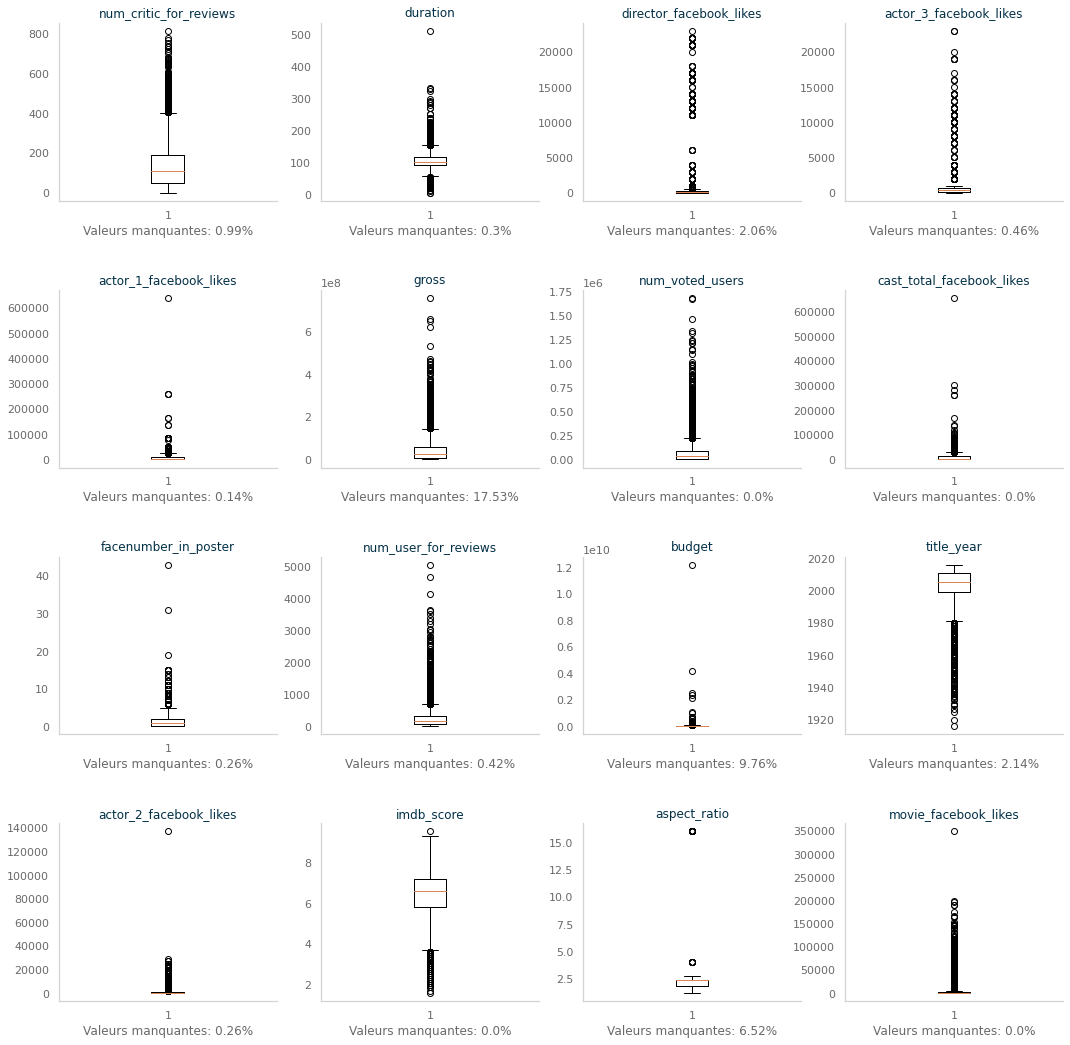

In [25]:
plt.rcParams["figure.figsize"] = (60,20)

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(18,18))
plt.subplots_adjust(hspace=.5)
axes=axes.flatten()

i=0
for x in colonnesQuantitatives:
        #print(x) #debug
        # on dessine le boxplot en excluant les valeurs manquantes pour chaque variable quantitative
        axes[i].boxplot(dfUnique[x].dropna())
        axes[i].set_title(x,color='#023047')
        axes[i].set_xlabel('Valeurs manquantes: '+str(sPourcentageValeursManquantes[x])+'%')
        i+=1

### <font color=#ffb703>Histogrammes</font>

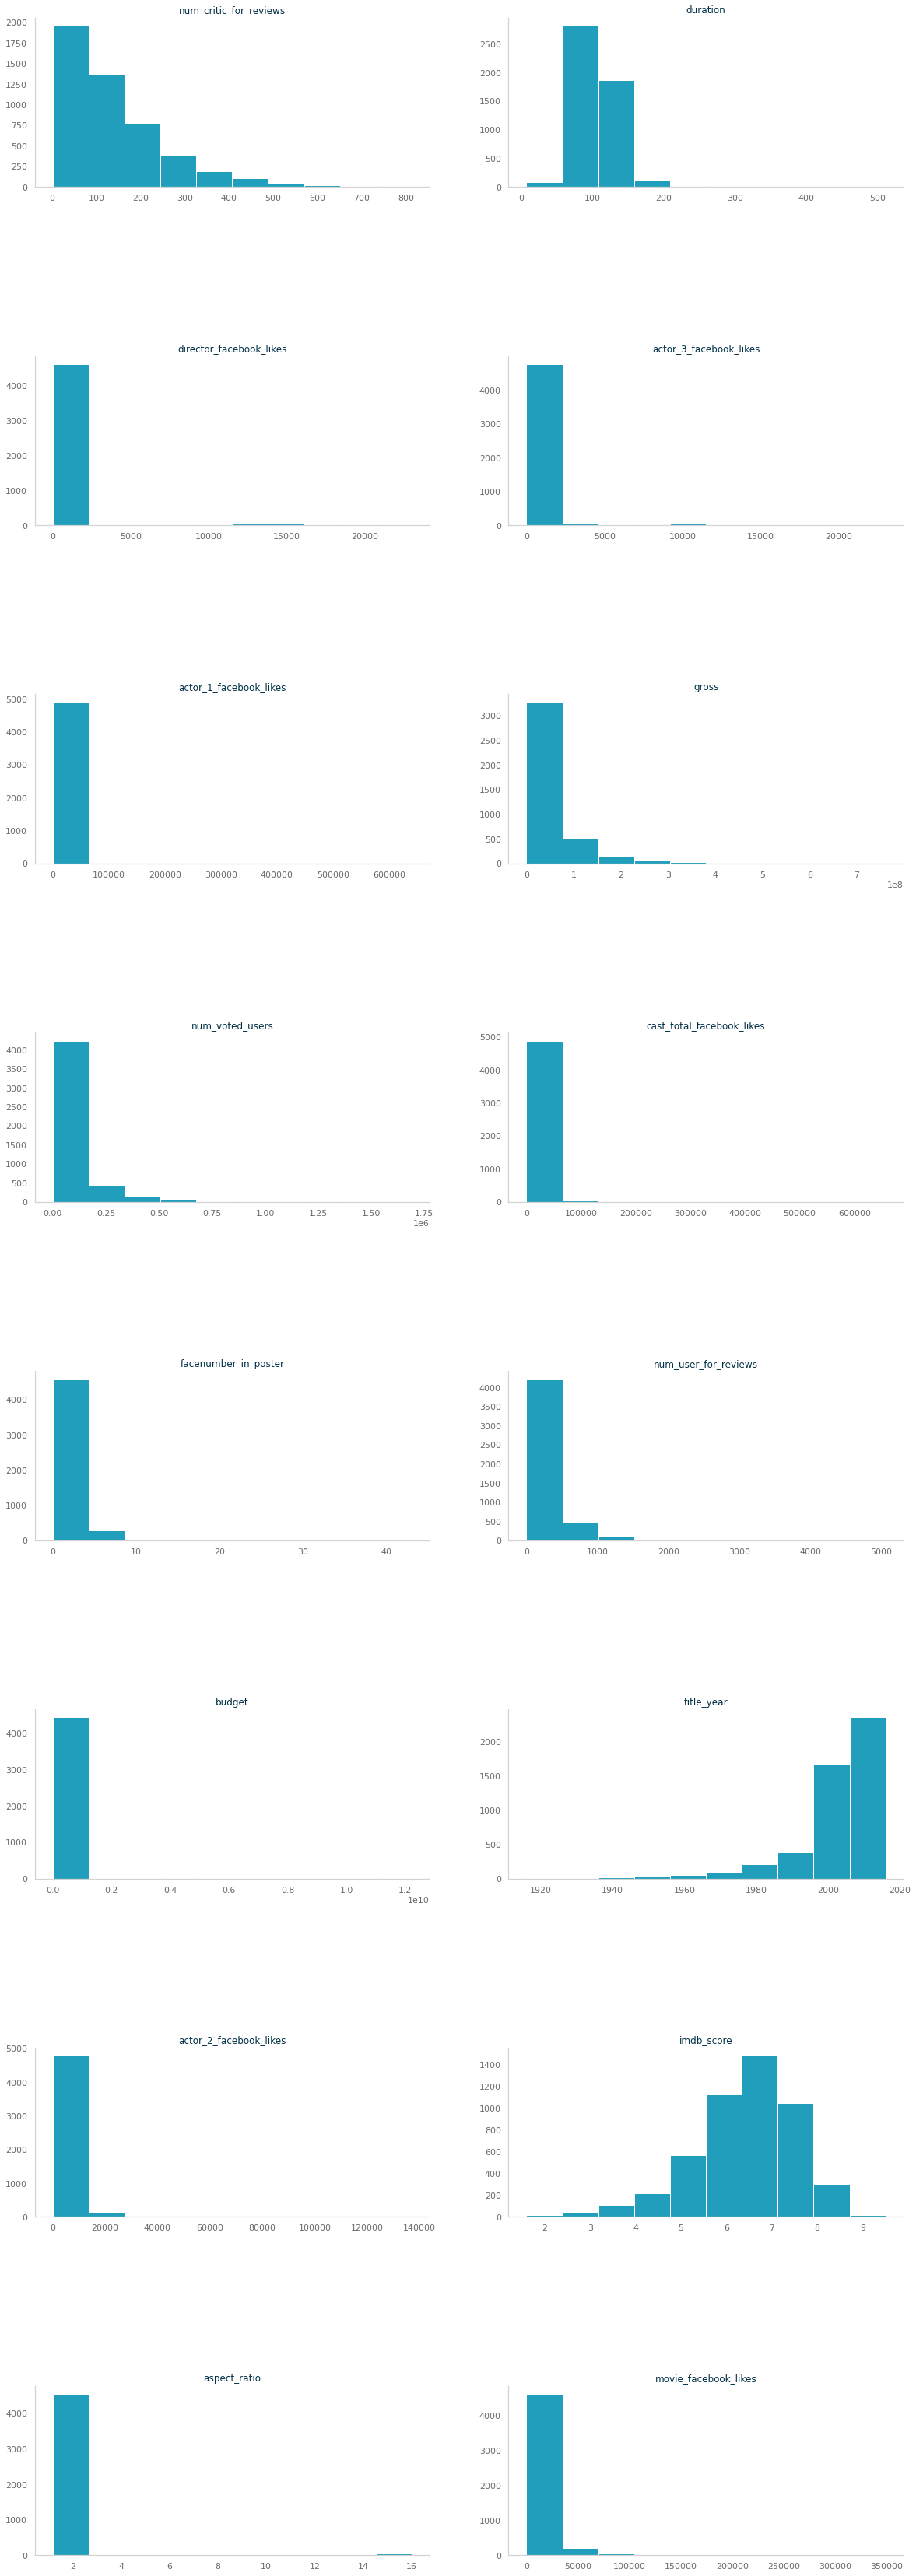

In [26]:
# Valeurs Quantitatives
plt.rcParams["figure.figsize"] = (80,60)

fig, axes = plt.subplots(nrows=8, ncols=2,figsize=(20,60))

# axes est un tableau à 2 dimensions: lignes, colonnes
# pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
axes=axes.flatten()

# espace vertical entre les rangées de sous graphiques
plt.subplots_adjust(hspace=1)

i=0
for x in colonnesQuantitatives:    
    axes[i].hist(dfUnique[x],color='#219ebc')
    axes[i].set_title(x,color='#023047')

    i=i+1

plt.show()

On note une distribution quasi normale de 'imdb_score'
On exclut l'aspect_ratio de notre etude car peu determinant dans le choix de film

In [27]:
del dfCleaned['aspect_ratio']
colonnesQuantitatives.remove('aspect_ratio')

In [28]:
# fonction mode qui agrege les variables qui sont sous un seuil 'threshold'(pour les très gros dataframe qui ont du mal à plotter)
def summarizeFrequenciesDf(df,threshold):
    dfFrequencies=df.value_counts(normalize=True) # frequence normalisée des valeurs de chaque variable
    mask = dfFrequencies>threshold # masque sur les fréquences > seuil
    dfTail= dfFrequencies.loc[~mask].sum()
    dfFrequencies=dfFrequencies.loc[mask] # filtre sur les fréquences < seuil
    dfFrequencies['autres']=dfTail # ajout des fréquences > seuil agregées dans la categorie 'Autre'
    return pd.DataFrame(dfFrequencies)

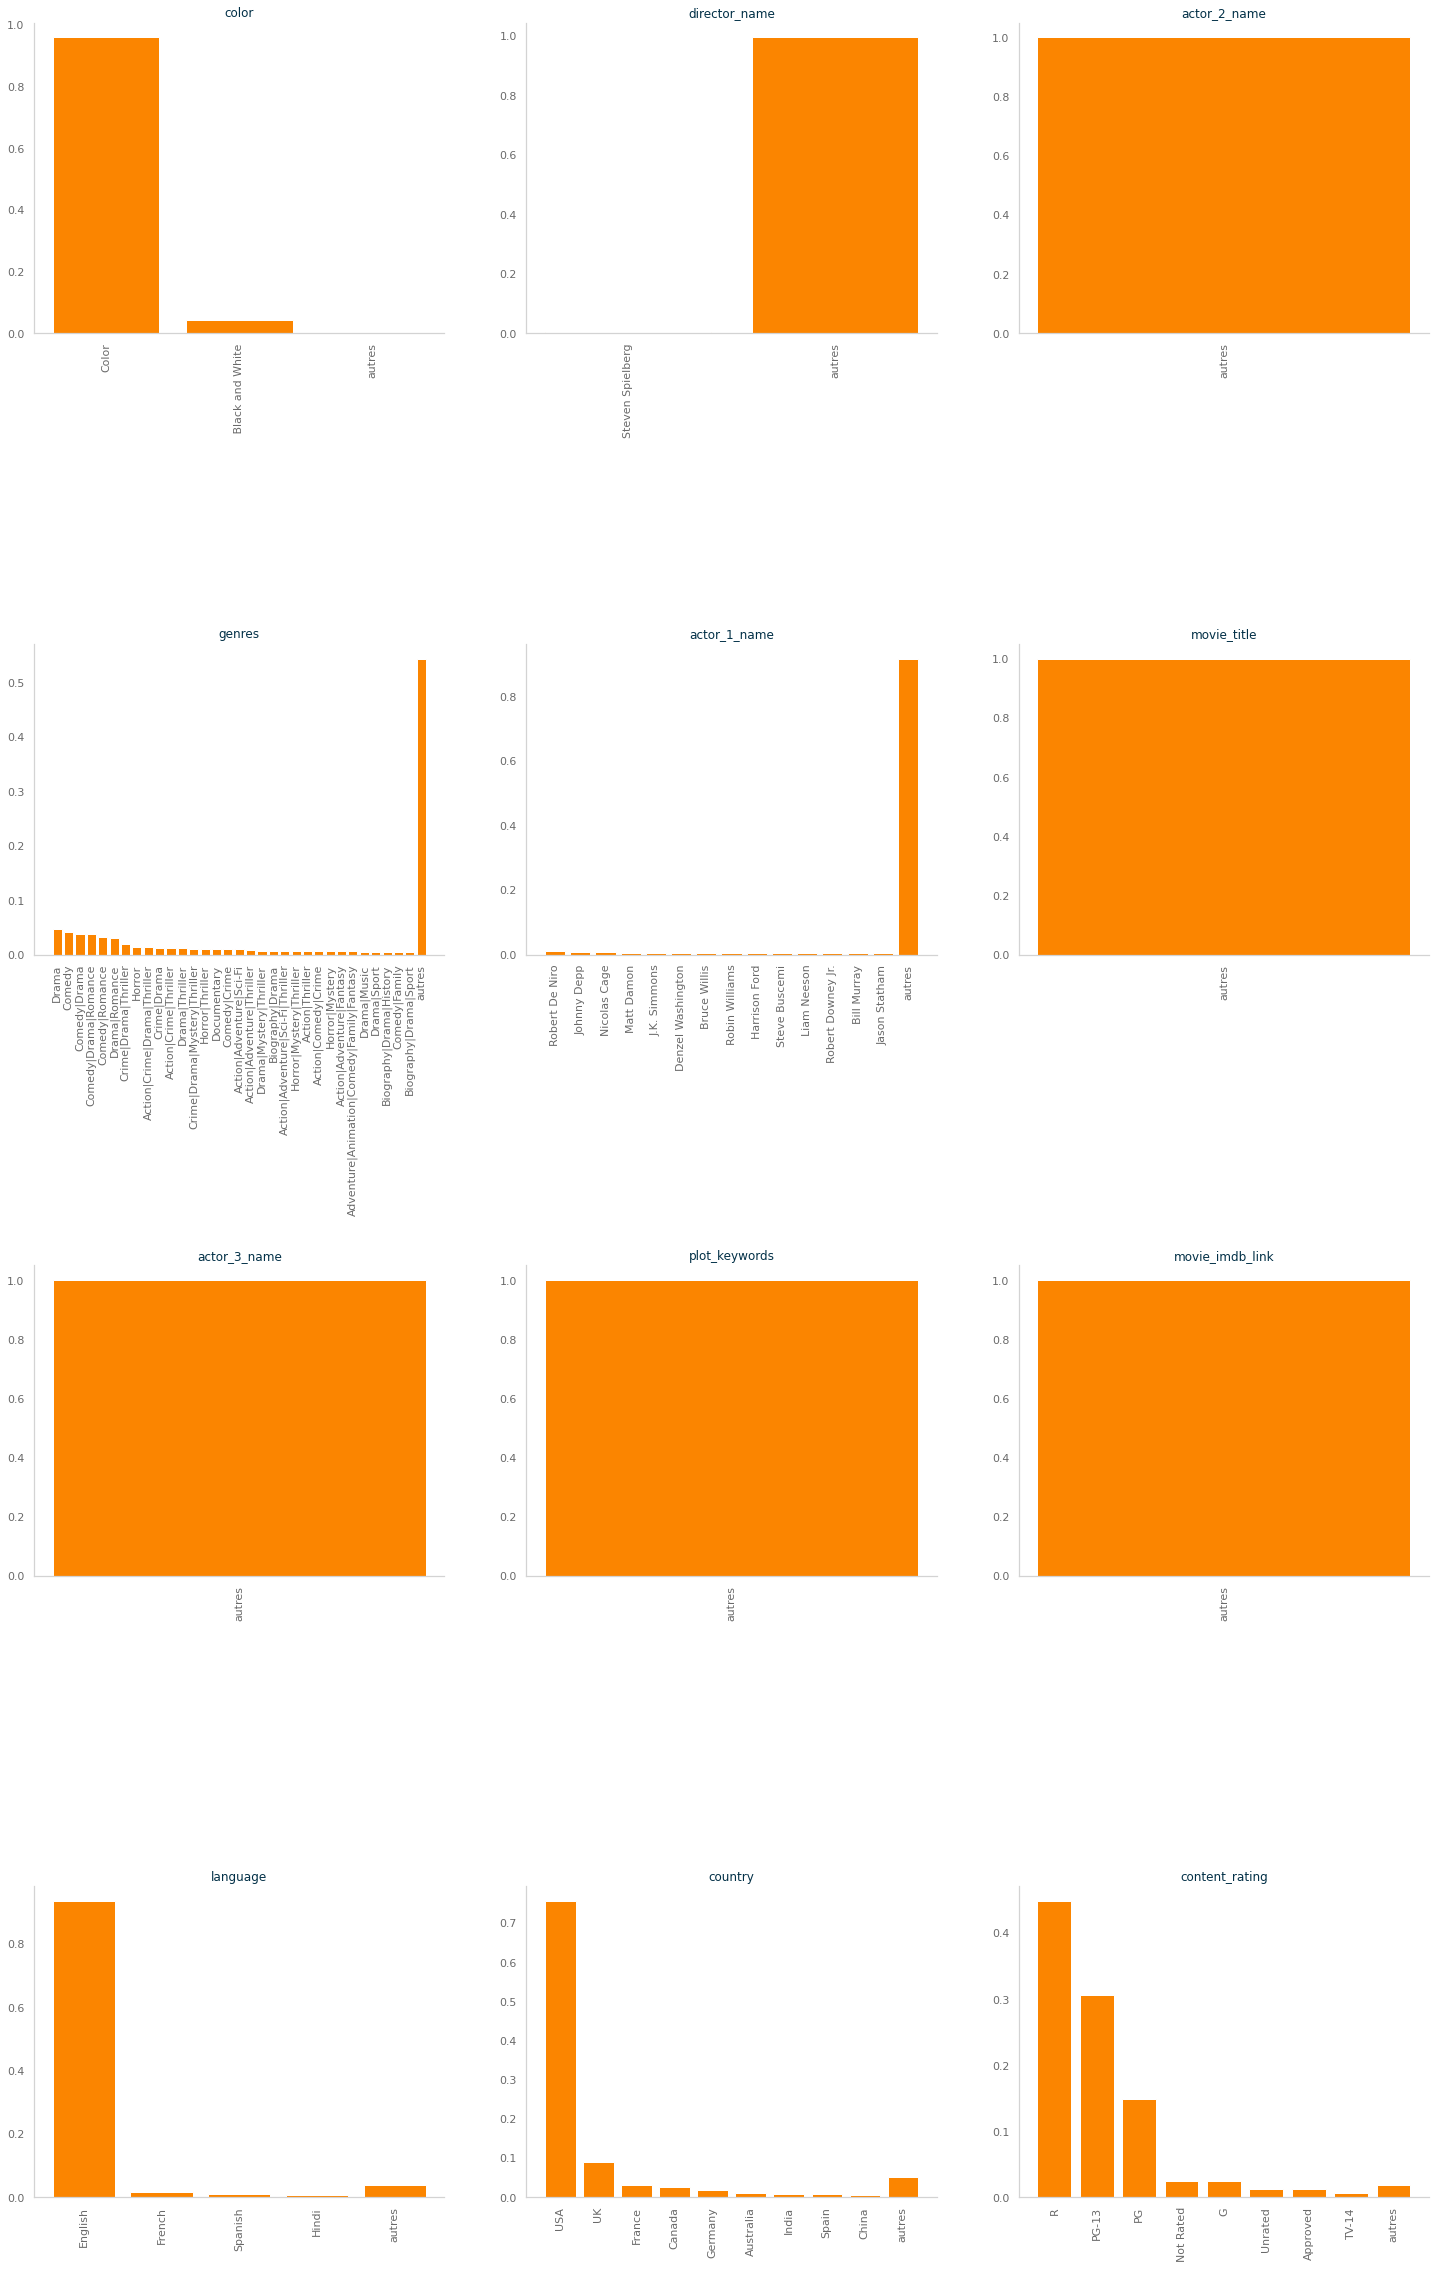

In [29]:
# Valeurs Qualitatives

plt.rcParams["figure.figsize"] = (100,80)
#plt.rcParams['font.size'] = '7.0'

fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(25,40))

# axes est un tableau à 2 dimensions: lignes, colonnes
# pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
axes=axes.flatten()

# espace vertical entre les rangées de sous graphiques
plt.subplots_adjust(hspace=1)
# initialisation du compteur
i=0
for x in colonnesQualitatives:
    # passe les labels sur l'axe des x en arriere plan
    axes[i].xaxis.label.set_visible(False)
    
    dfCourant=summarizeFrequenciesDf(dfUnique[x],0.005)

    axes[i].bar(dfCourant[x].index,dfCourant[x],color='#fb8500')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(x,color='#023047')

    i=i+1

#fig.suptitle("Données Qualitatives - Mode", fontsize=14)
plt.show()

On supprimera les variables:
* movie_imdb_link (unicité avec movie_title)
* language (majoritairement anglais, donc critere de differenciation peu determinant)
* country (majoritairement USA, donc critere de differenciation peu determinant)
* content_rating (classification peu parlante pour un francophone)
* color (majoritairement color, donc critere de differenciation peu determinant)

In [30]:
dfCleaned=dfCleaned.drop(['movie_imdb_link','language','country','content_rating','color'], axis=1)

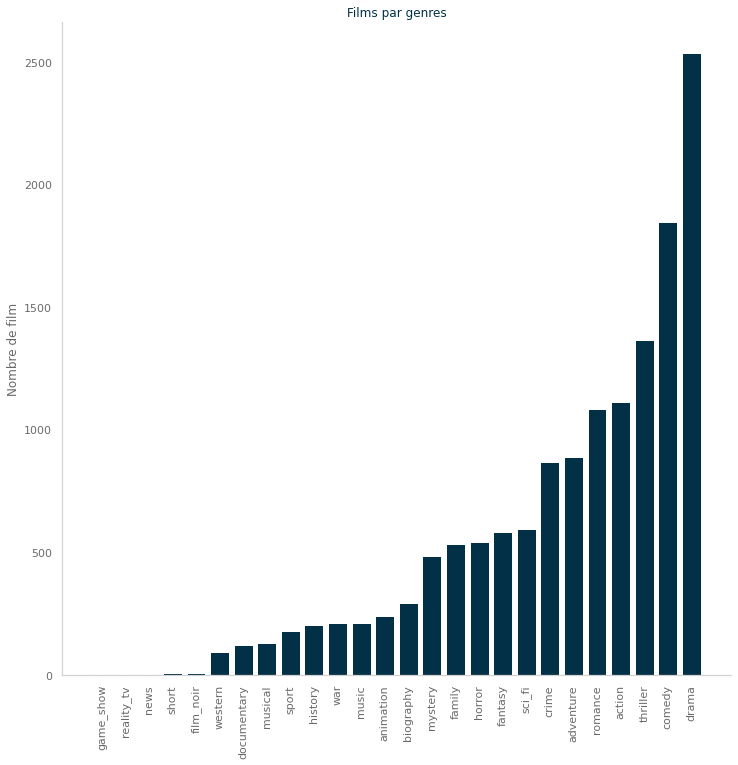

In [31]:
# Répartition des films par genre

dfGenresTries=dfGenres.sum().sort_values()

plt.rcParams["figure.figsize"] = (12,12)

dfGenresTries=dfGenres.sum().sort_values()
plt.xticks(rotation='vertical')
plt.bar(dfGenresTries.index,dfGenresTries,color='#023047')
plt.ylabel('Nombre de film')
plt.title('Films par genres',color='#023047')

plt.show()

=> on exclue les genres 'game_show', 'reality_tv', 'news' qui ne caracterisent que tres peu de films

In [32]:
dfGenres=dfGenres.drop(['game_show', 'reality_tv', 'news'],axis=1)

In [33]:
pd.set_option('display.min_rows', 20) 
dfPlotCounts=dfPlots.sum(axis=0).sort_values()
total=dfPlotCounts.values.sum()

In [34]:
mask = dfPlotCounts>30 # masque sur les plots qui apparaissent dans plus de X films
dfTail=dfPlotCounts[~mask]
dfFrequencies=dfPlotCounts.loc[mask] # filtre sur les fréquences < seuil
#dfFrequencies

In [35]:
dfPlotCounts

librarian            1
identity_theft       1
iceman               1
serial_murderer      1
iceberg              1
ice_storm            1
ice_skater           1
ice_pick             1
idiot                1
ice_hockey           1
                  ... 
boy                 71
alien               80
high_school         88
new_york_city       91
police             125
death              129
nan                152
murder             157
friend             164
love               191
Length: 8112, dtype: int64

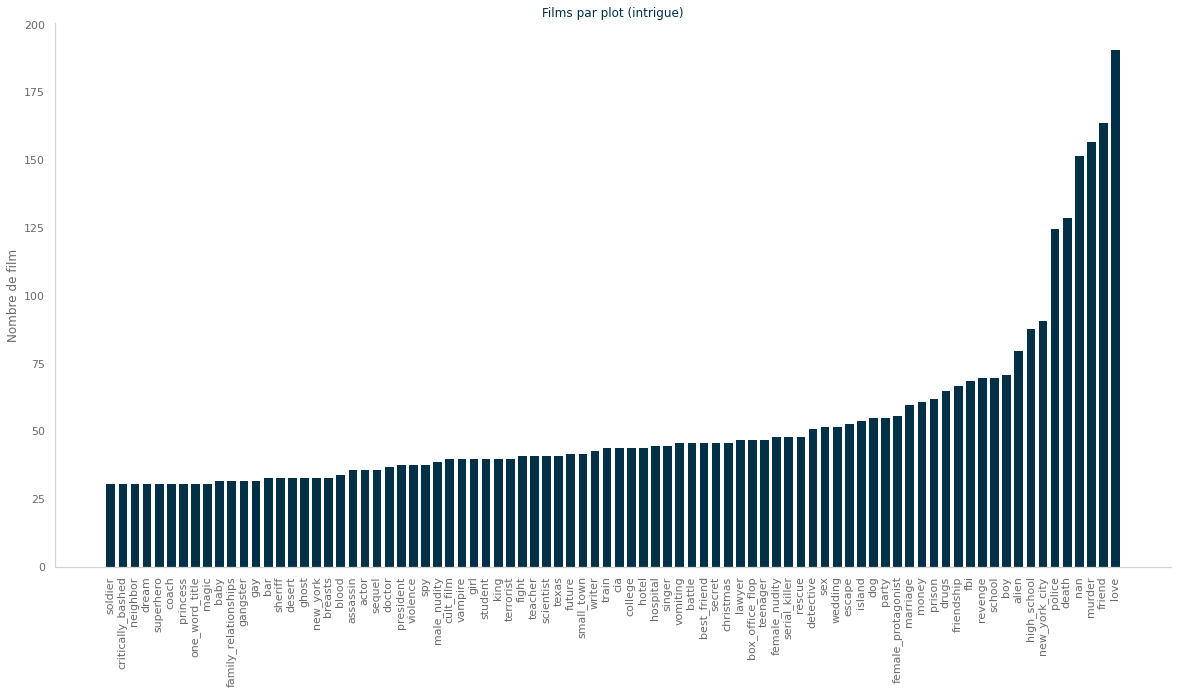

In [36]:
# Répartition des films par plot
plt.rcParams["figure.figsize"] = (20,10)

plt.xticks(rotation='vertical')
plt.ylabel('Nombre de film')
plt.bar(dfFrequencies.index,dfFrequencies,color='#023047')
plt.title('Films par plot (intrigue)',color='#023047')

plt.show()

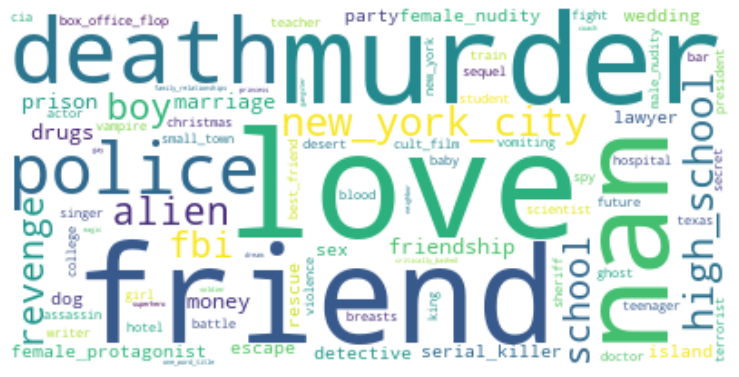

In [37]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate_from_frequencies(dfFrequencies)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

=> On ne gardera que les plots significatif qui designent plus de 40 films

In [38]:
dfPlots=dfPlots[dfFrequencies.index]

### <font color=#ffb703>Correlations</font>

In [39]:
matriceCorrelation=(dfCleaned.dropna()).corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.00,0.23,0.18,0.25,0.17,0.46,0.60,0.24,-0.03,0.57,0.10,0.39,0.26,0.35,0.70
duration,0.23,1.00,0.18,0.12,0.09,0.24,0.34,0.12,0.03,0.35,0.07,-0.14,0.13,0.36,0.22
director_facebook_likes,0.18,0.18,1.00,0.12,0.09,0.14,0.31,0.12,-0.05,0.23,0.02,-0.05,0.12,0.19,0.17
actor_3_facebook_likes,0.25,0.12,0.12,1.00,0.25,0.28,0.26,0.48,0.11,0.21,0.04,0.11,0.54,0.07,0.27
actor_1_facebook_likes,0.17,0.09,0.09,0.25,1.00,0.14,0.18,0.95,0.06,0.13,0.02,0.09,0.39,0.09,0.13
gross,0.46,0.24,0.14,0.28,0.14,1.00,0.63,0.23,-0.03,0.55,0.10,0.04,0.24,0.21,0.36
num_voted_users,0.60,0.34,0.31,0.26,0.18,0.63,1.00,0.25,-0.03,0.79,0.07,0.01,0.24,0.48,0.52
cast_total_facebook_likes,0.24,0.12,0.12,0.48,0.95,0.23,0.25,1.00,0.09,0.18,0.03,0.12,0.64,0.11,0.20
facenumber_in_poster,-0.03,0.03,-0.05,0.11,0.06,-0.03,-0.03,0.09,1.00,-0.08,-0.02,0.07,0.07,-0.07,0.01
num_user_for_reviews,0.57,0.35,0.23,0.21,0.13,0.55,0.79,0.18,-0.08,1.00,0.07,0.01,0.19,0.32,0.38


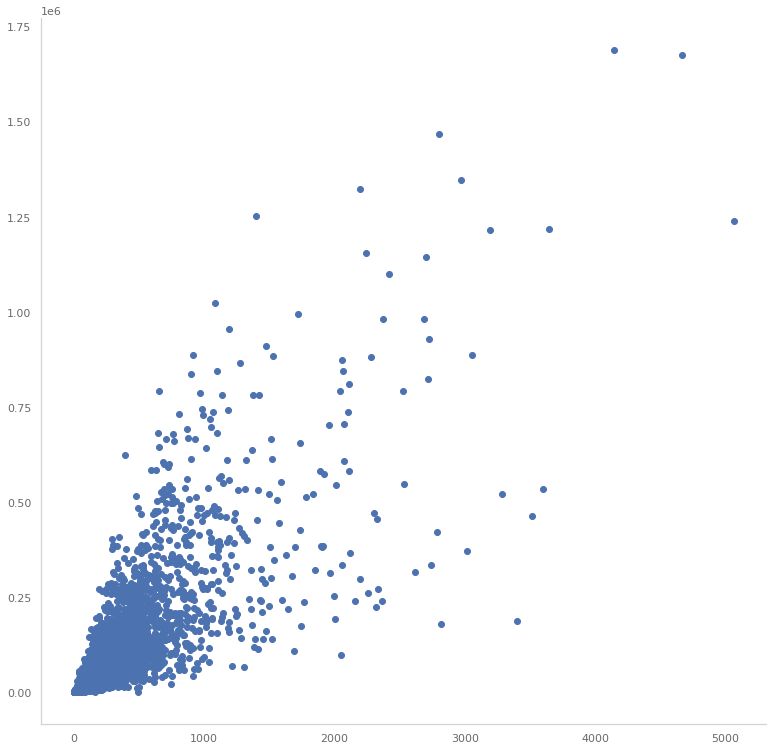

In [40]:
plt.scatter(dfCleaned[colonnesQuantitatives]['num_user_for_reviews'],dfCleaned[colonnesQuantitatives]['num_voted_users'])

In [41]:
import statsmodels.api as sm
dfComplete=dfCleaned.dropna()
X=dfComplete[colonnesQuantitatives]['cast_total_facebook_likes']

# ajout de la constante
X=sm.add_constant(X)

y=dfComplete[colonnesQuantitatives]['actor_1_facebook_likes']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actor_1_facebook_likes   R-squared:                       0.897
Model:                                OLS   Adj. R-squared:                  0.897
Method:                     Least Squares   F-statistic:                 3.275e+04
Date:                    Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                            21:17:27   Log-Likelihood:                -37457.
No. Observations:                    3772   AIC:                         7.492e+04
Df Residuals:                        3770   BIC:                         7.493e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Remarques:
* R^2 proche de 0,9 , score significatif
* la variable cast_total_facebook_likes explique 77% de la variable actor_1_facebook_likes avec une p-value à 0 (qui confirme l'hypothese alternative que le coefficient est different de 0)
* taux de valeurs manquantes de cast_total_facebook_likes (0%) < taux de valeurs manquantes de actor_1_facebook_likes (14%)

=> on exclue la variable cast_total_facebook_likes de notre etude

In [42]:
del dfCleaned['cast_total_facebook_likes']
colonnesQuantitatives.remove('cast_total_facebook_likes')

In [43]:
import statsmodels.api as sm
dfComplete=dfCleaned.dropna()
X=dfComplete[colonnesQuantitatives]['num_user_for_reviews']

# ajout de la constante
X=sm.add_constant(X)

y=dfComplete[colonnesQuantitatives]['num_voted_users']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        num_voted_users   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     6090.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:17:27   Log-Likelihood:                -48512.
No. Observations:                3772   AIC:                         9.703e+04
Df Residuals:                    3770   BIC:                         9.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7038.5906 

Remarques:
* R^2 proche de 0,6 , score peu significatif

=> le score R^2 n'est pas suffisamment signicatif: on va garder num_user_for_reviews et num_voted_users dans notre etude

In [44]:
dfCleaned.update(dfQualitativesUniformisees)

In [45]:
dfCleaned=dfCleaned.replace('\s+', ' ', regex=True)

## <font color=#fb8500>Ecriture des donnees</font>

In [46]:
dfFrequencies.index

Index(['soldier', 'critically_bashed', 'neighbor', 'dream', 'superhero',
       'coach', 'princess', 'one_word_title', 'magic', 'baby',
       'family_relationships', 'gangster', 'gay', 'bar', 'sheriff', 'desert',
       'ghost', 'new_york', 'breasts', 'blood', 'assassin', 'actor', 'sequel',
       'doctor', 'president', 'violence', 'spy', 'male_nudity', 'cult_film',
       'vampire', 'girl', 'student', 'king', 'terrorist', 'fight', 'teacher',
       'scientist', 'texas', 'future', 'small_town', 'writer', 'train', 'cia',
       'college', 'hotel', 'hospital', 'singer', 'vomiting', 'battle',
       'best_friend', 'secret', 'christmas', 'lawyer', 'box_office_flop',
       'teenager', 'female_nudity', 'serial_killer', 'rescue', 'detective',
       'sex', 'wedding', 'escape', 'island', 'dog', 'party',
       'female_protagonist', 'marriage', 'money', 'prison', 'drugs',
       'friendship', 'fbi', 'revenge', 'school', 'boy', 'alien', 'high_school',
       'new_york_city', 'police', 'death',

In [47]:
dfCleaned.to_csv('movie_metadata_clean.csv',index=False)
dfPlots[dfFrequencies.index].to_csv('movie_plots.csv',index=False)
dfGenres.to_csv('movie_genres.csv',index=False)

In [48]:
now=time.time()
now-start

17.034257888793945

# <font color=#219ebc>Recommandation de films - Exploration </font>

# Sommaire
* [Configuration](#Configuration)
* [Chargement des données](#Chargement-des-donnees)
* [Exploration](#Exploration)
    * [Distributions](#Distributions)
    * [NMF](#NMF)
    * [Règles d'association](#Regles-d'association)
        * [Genres](#Genres)
        * [Scores et likes](#Scores-et-likes)
        * [Scores et budget](#Scores-et-budget)
    * [Similarités](#Similarites)
    * [KMeans](#KMeans)
    * [DBSCAN](#DBSCAN)
    * [ACP](#ACP)

## <font color=#fb8500>Configuration</font>

On configure l'affichage de matplotlib en utilisant seaborn, cela nous permettra d'avoir un joli affichage et de profiter des performances de matplotlib

In [49]:
import matplotlib as mplt

import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})

mplt.font_manager._rebuild()

## <font color=#fb8500>Chargement des donnees</font>

In [50]:
import time
start=time.time()

In [51]:
import pandas as pd

dfGenres=pd.read_csv("./movie_genres.csv",sep=",",encoding="utf-8")
dfPlots=pd.read_csv("./movie_plots.csv",sep=",",encoding="utf-8")
dfMovies=pd.read_csv("./movie_metadata_clean.csv",sep=",",encoding="utf-8")

In [52]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director_name            4817 non-null   object 
 1   num_critic_for_reviews   4870 non-null   float64
 2   duration                 4904 non-null   float64
 3   director_facebook_likes  4817 non-null   float64
 4   actor_3_facebook_likes   4896 non-null   float64
 5   actor_2_name             4906 non-null   object 
 6   actor_1_facebook_likes   4912 non-null   float64
 7   gross                    4056 non-null   float64
 8   genres                   4919 non-null   object 
 9   actor_1_name             4912 non-null   object 
 10  movie_title              4919 non-null   object 
 11  num_voted_users          4919 non-null   int64  
 12  actor_3_name             4896 non-null   object 
 13  facenumber_in_poster     4906 non-null   float64
 14  plot_keywords           

In [53]:
dfPlots

,soldier,critically_bashed,neighbor,dream,superhero,coach,princess,one_word_title,magic,baby,family_relationships,gangster,gay,bar,sheriff,desert,ghost,new_york,breasts,blood,assassin,actor,sequel,doctor,president,violence,spy,male_nudity,cult_film,vampire,girl,student,king,terrorist,fight,teacher,scientist,texas,future,small_town,writer,train,cia,college,hotel,hospital,singer,vomiting,battle,best_friend,secret,christmas,lawyer,box_office_flop,teenager,female_nudity,serial_killer,rescue,detective,sex,wedding,escape,island,dog,party,female_protagonist,marriage,money,prison,drugs,friendship,fbi,revenge,school,boy,alien,high_school,new_york_city,police,death,nan,murder,friend,love
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
dfGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       4919 non-null   int64
 1   adventure    4919 non-null   int64
 2   animation    4919 non-null   int64
 3   biography    4919 non-null   int64
 4   comedy       4919 non-null   int64
 5   crime        4919 non-null   int64
 6   documentary  4919 non-null   int64
 7   drama        4919 non-null   int64
 8   family       4919 non-null   int64
 9   fantasy      4919 non-null   int64
 10  film_noir    4919 non-null   int64
 11  history      4919 non-null   int64
 12  horror       4919 non-null   int64
 13  music        4919 non-null   int64
 14  musical      4919 non-null   int64
 15  mystery      4919 non-null   int64
 16  romance      4919 non-null   int64
 17  sci_fi       4919 non-null   int64
 18  short        4919 non-null   int64
 19  sport        4919 non-null   int64
 20  thriller

In [55]:
dfPlots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   soldier               4919 non-null   int64
 1   critically_bashed     4919 non-null   int64
 2   neighbor              4919 non-null   int64
 3   dream                 4919 non-null   int64
 4   superhero             4919 non-null   int64
 5   coach                 4919 non-null   int64
 6   princess              4919 non-null   int64
 7   one_word_title        4919 non-null   int64
 8   magic                 4919 non-null   int64
 9   baby                  4919 non-null   int64
 10  family_relationships  4919 non-null   int64
 11  gangster              4919 non-null   int64
 12  gay                   4919 non-null   int64
 13  bar                   4919 non-null   int64
 14  sheriff               4919 non-null   int64
 15  desert                4919 non-null   int64
 16  ghost 

In [56]:
import numpy as np
# identification des colonnes numériques et qualitatives
colonnesQuantitatives=dfMovies.select_dtypes(np.number).columns.tolist()
colonnesQualitatives=dfMovies.select_dtypes('O').columns.tolist()

## <font color=#fb8500>Exploration</font>

### <font color=#ffb703>Distributions</font>

#### <font color=#ffb703>Likes</font>

In [57]:
# creation de variable: comptage de tous les likes (director, movie, actor_1, actor_2, actor_3)
dfMovies["total_likes"]=dfMovies["director_facebook_likes"]+dfMovies["actor_1_facebook_likes"]+dfMovies["actor_2_facebook_likes"]+dfMovies["actor_3_facebook_likes"]+dfMovies["movie_facebook_likes"]
dfMovies.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,total_likes
0,james cameron,723.0,178.0,0.0,855.0,joel david moore,1000.0,760505847.0,action adventure fantasy sci_fi,cch pounder,avatar,886204,wes studi,0.0,avatar future marine native paraplegic,3054.0,237000000.0,2009.0,936.0,7.9,33000,35791.0
1,gore verbinski,302.0,169.0,563.0,1000.0,orlando bloom,40000.0,309404152.0,action adventure fantasy,johnny depp,pirates of the caribbean at world end,471220,jack davenport,0.0,goddess marriage_ceremony marriage_proposal pi...,1238.0,300000000.0,2007.0,5000.0,7.1,0,46563.0
2,sam mendes,602.0,148.0,0.0,161.0,rory kinnear,11000.0,200074175.0,action adventure thriller,christoph waltz,spectre,275868,stephanie sigman,1.0,bomb espionage sequel spy terrorist,994.0,245000000.0,2015.0,393.0,6.8,85000,96554.0
3,christopher nolan,813.0,164.0,22000.0,23000.0,christian bale,27000.0,448130642.0,action thriller,tom hardy,the dark knight rises,1144337,joseph gordon levitt,0.0,deception imprisonment lawlessness police_offi...,2701.0,250000000.0,2012.0,23000.0,8.5,164000,259000.0
4,doug walker,NaN,NaN,131.0,NaN,rob walker,131.0,NaN,documentary,doug walker,star wars episode vii the force awakens,8,NaN,0.0,NaN,NaN,NaN,NaN,12.0,7.1,0,NaN


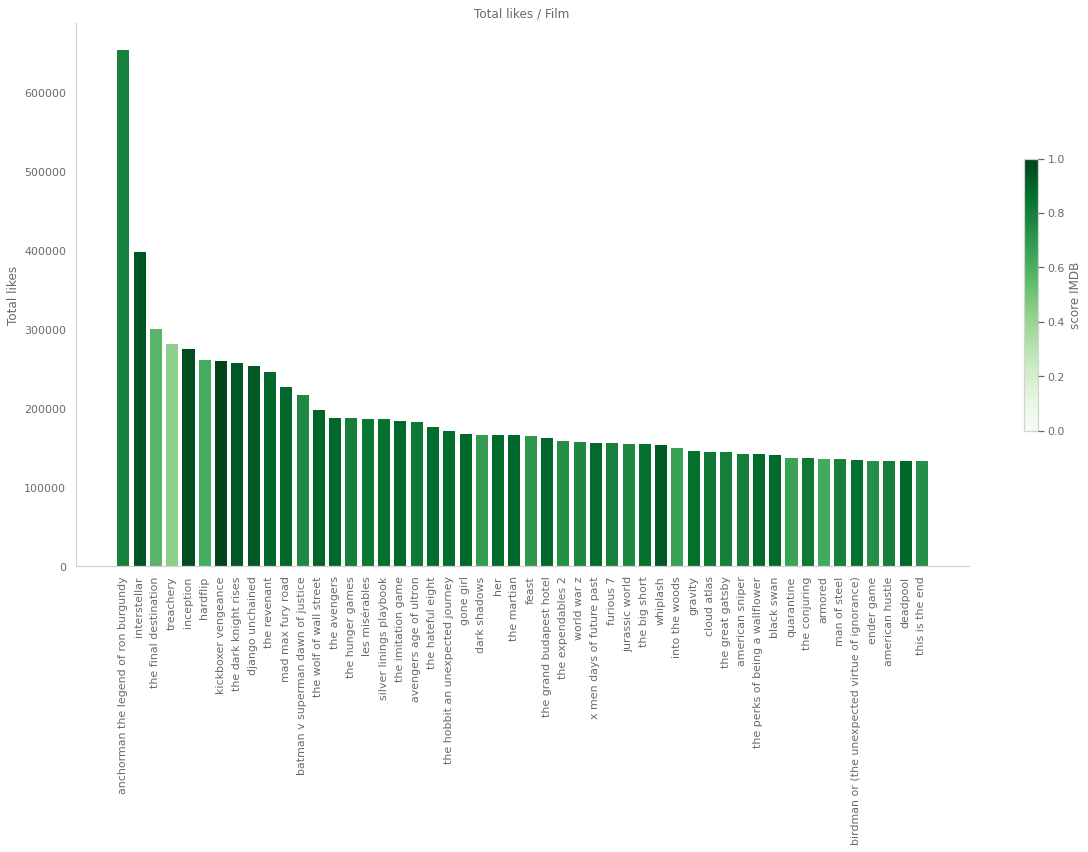

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Total likes / Film')
plt.ylabel('Total likes')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('Greens')

dfMoviesLikes=dfMovies[['movie_title','total_likes','imdb_score']].sort_values(by=['total_likes'],ascending=False).head(50)

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesLikes['imdb_score'].max())

plot=plt.bar(dfMoviesLikes['movie_title'],dfMoviesLikes['total_likes'].values,color=cmap(normalise(dfMoviesLikes['imdb_score'].values)))

plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="score IMDB",shrink=0.5, orientation='vertical')

plt.show()

#### <font color=#ffb703>Réalisateurs</font>

In [59]:
pd.options.display.min_rows = 20

#dfMoviesGrouped=dfMovies.groupby('director_name').agg({'movie_title': 'count'},{'score_imdb':'sum'}).sort_values(by='movie_title',ascending=False).head(100)
dfMoviesDirectorGrouped=dfMovies.groupby('director_name').agg({'movie_title': 'count','imdb_score':'sum','total_likes':'sum'}).sort_values(by=['movie_title'],ascending=False).head(30)
dfMoviesDirectorGrouped

,movie_title,imdb_score,total_likes
director_name,,,
steven spielberg,26,194.5,1222318.0
woody allen,22,154.2,624581.0
martin scorsese,20,153.2,1093480.0
clint eastwood,20,144.5,936790.0
ridley scott,16,114.1,651781.0
spike lee,16,105.1,167713.0
renny harlin,15,86.2,102124.0
steven soderbergh,15,100.2,346088.0
tim burton,14,98.7,818040.0


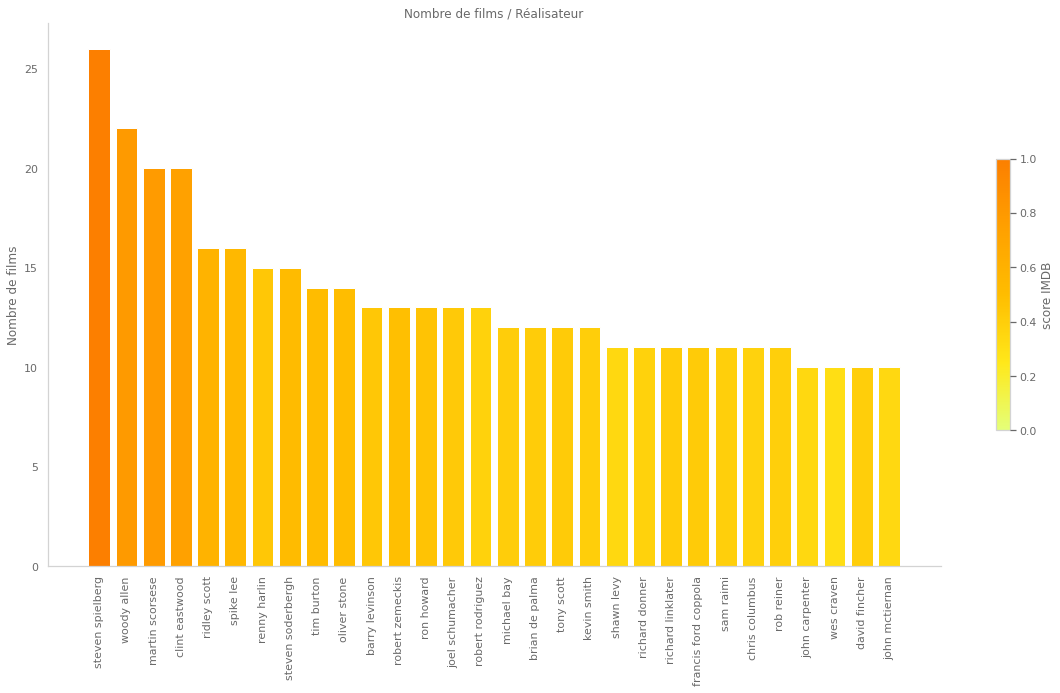

In [60]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Nombre de films / Réalisateur')
plt.ylabel('Nombre de films')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('Wistia')

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesDirectorGrouped['imdb_score'].max())

plot=plt.bar(dfMoviesDirectorGrouped.index,dfMoviesDirectorGrouped['movie_title'].values,color=cmap(normalise(dfMoviesDirectorGrouped['imdb_score'].values)))
#plot=plt.bar(dfMoviesGrouped.index,dfMoviesGrouped['movie_title'].values,color=my_cmap(dfMoviesGrouped['imdb_score'].values))
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="score IMDB",shrink=0.5, orientation='vertical')

plt.show()

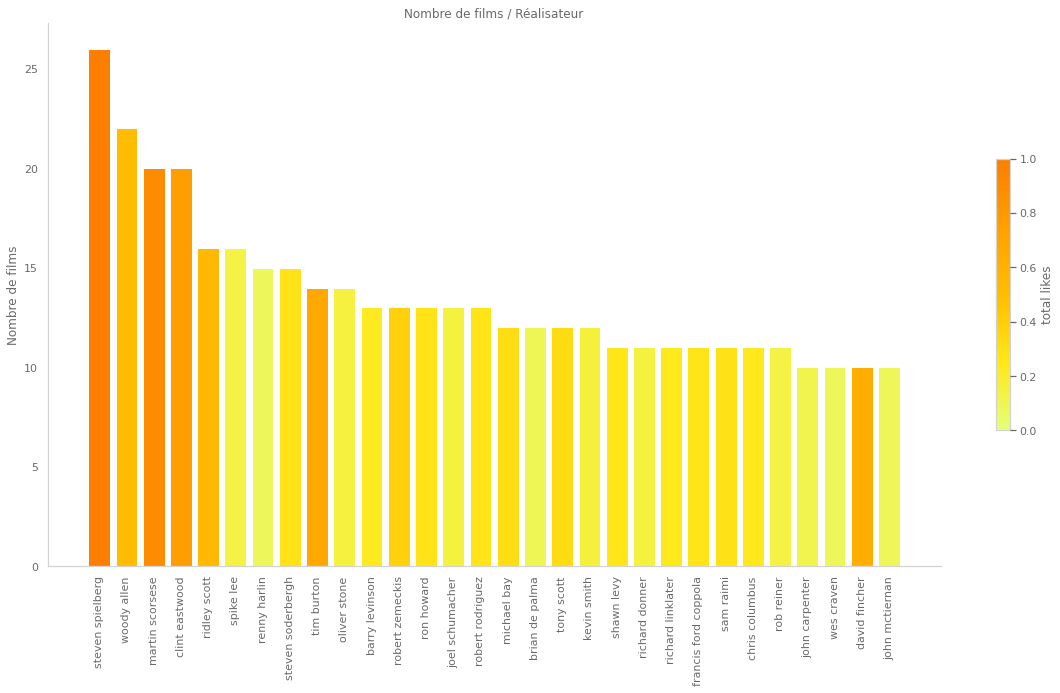

In [61]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Nombre de films / Réalisateur')
plt.ylabel('Nombre de films')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('Wistia')

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesDirectorGrouped['total_likes'].max())

plot=plt.bar(dfMoviesDirectorGrouped.index,dfMoviesDirectorGrouped['movie_title'].values,color=cmap(normalise(dfMoviesDirectorGrouped['total_likes'].values)))
#plot=plt.bar(dfMoviesGrouped.index,dfMoviesGrouped['movie_title'].values,color=my_cmap(dfMoviesGrouped['imdb_score'].values))
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="total likes",shrink=0.5, orientation='vertical')

plt.show()

#### <font color=#ffb703>Actors</font>

In [62]:
dfMovies[['movie_title','actor_1_name','actor_2_name','actor_3_name']]
pd.options.display.min_rows = 20

#dfMoviesGrouped=dfMovies.groupby('director_name').agg({'movie_title': 'count'},{'score_imdb':'sum'}).sort_values(by='movie_title',ascending=False).head(100)
dfMoviesActorGrouped=dfMovies.groupby('actor_1_name').agg({'movie_title': 'count','imdb_score':'sum','total_likes':'sum'}).sort_values(by=['movie_title'],ascending=False).head(30)
dfMoviesActorGrouped

,movie_title,imdb_score,total_likes
actor_1_name,,,
robert de niro,48,324.5,1865305.0
johnny depp,36,244.1,2505396.0
nicolas cage,32,198.8,682577.0
j.k. simmons,29,193.2,1312449.0
matt damon,29,202.5,973991.0
denzel washington,29,204.6,1015920.0
bruce willis,28,183.4,781875.0
liam neeson,27,175.0,925036.0
steve buscemi,27,173.5,666472.0


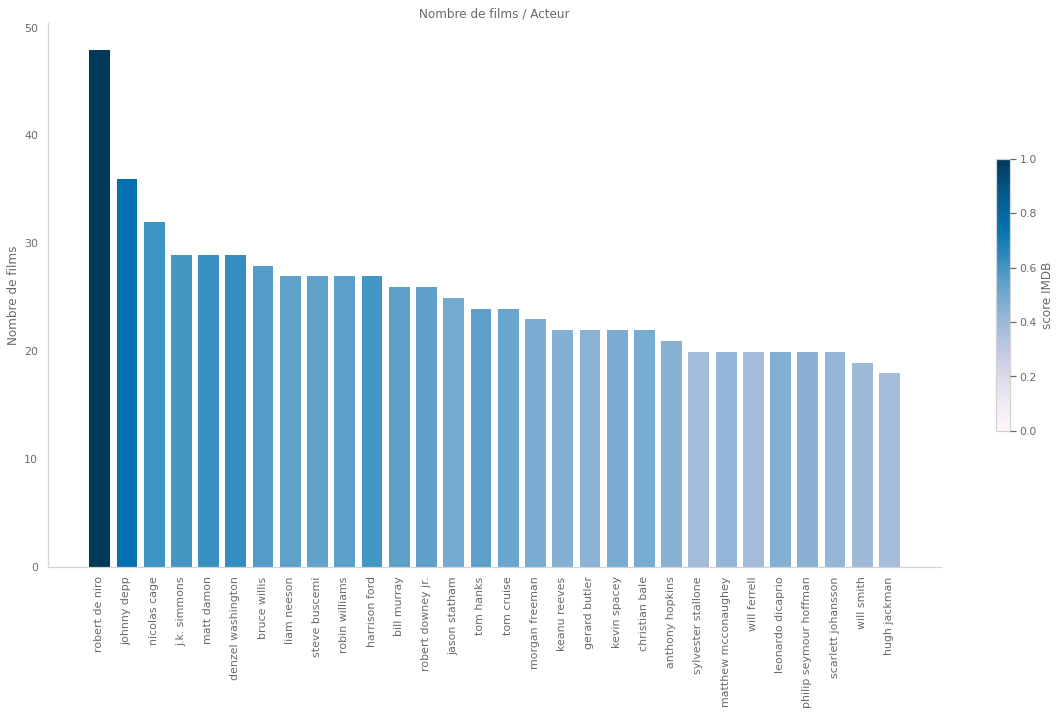

In [63]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Nombre de films / Acteur')
plt.ylabel('Nombre de films')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('PuBu')

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesActorGrouped['imdb_score'].max())

plot=plt.bar(dfMoviesActorGrouped.index,dfMoviesActorGrouped['movie_title'].values,color=cmap(normalise(dfMoviesActorGrouped['imdb_score'].values)))
#plot=plt.bar(dfMoviesGrouped.index,dfMoviesGrouped['movie_title'].values,color=my_cmap(dfMoviesGrouped['imdb_score'].values))
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="score IMDB",shrink=0.5, orientation='vertical')

plt.show()

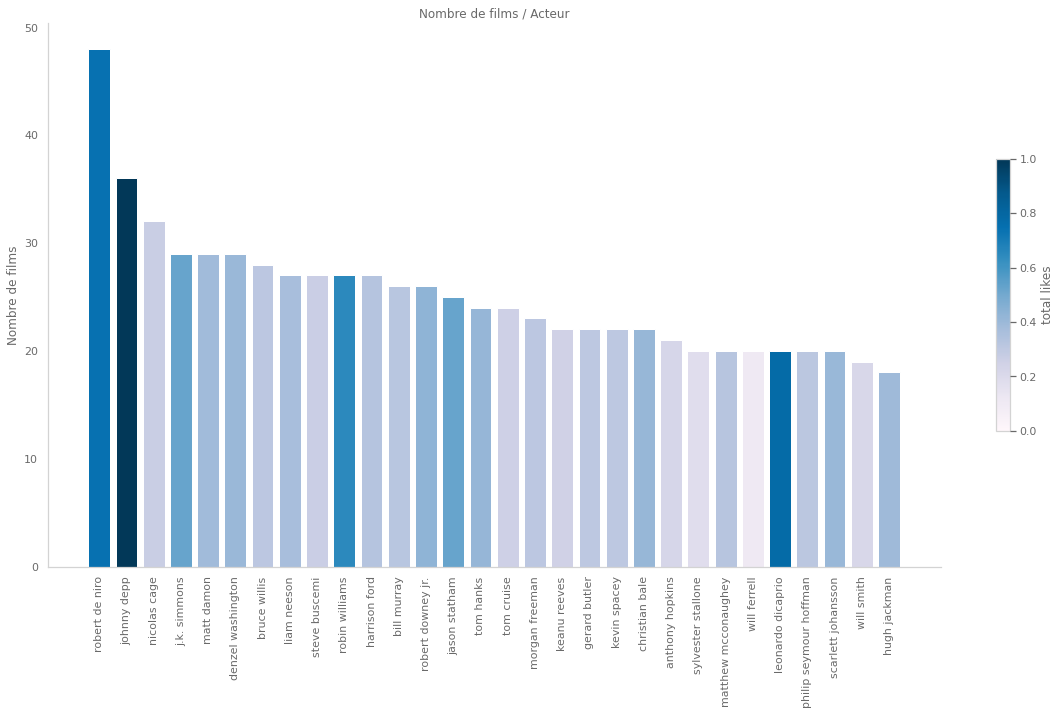

In [64]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Nombre de films / Acteur')
plt.ylabel('Nombre de films')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('PuBu')

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesActorGrouped['total_likes'].max())

plot=plt.bar(dfMoviesActorGrouped.index,dfMoviesActorGrouped['movie_title'].values,color=cmap(normalise(dfMoviesActorGrouped['total_likes'].values)))
#plot=plt.bar(dfMoviesGrouped.index,dfMoviesGrouped['movie_title'].values,color=my_cmap(dfMoviesGrouped['imdb_score'].values))
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="total likes",shrink=0.5, orientation='vertical')

plt.show()

#### <font color=#ffb703>Budget-revenus</font>

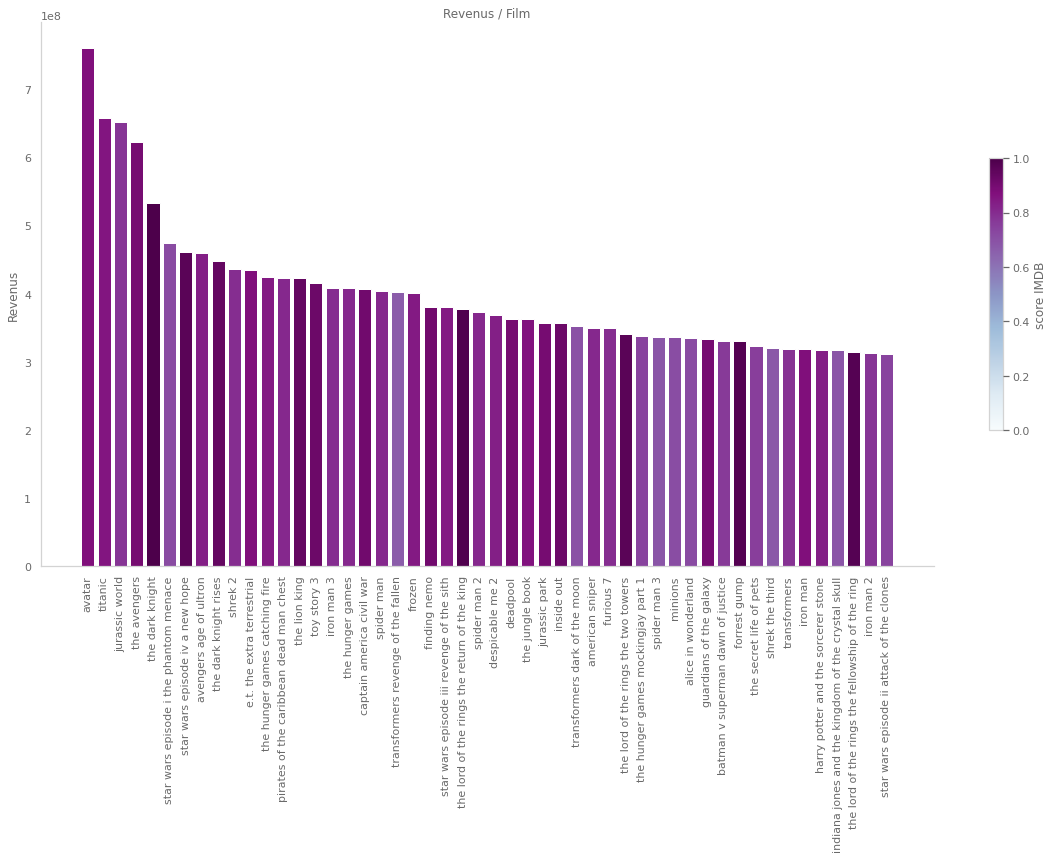

In [65]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Revenus / Film')
plt.ylabel('Revenus')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('BuPu')

dfMoviesGross=dfMovies[['movie_title','gross','imdb_score']].sort_values(by=['gross'],ascending=False).head(50)

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesGross['imdb_score'].max())

plot=plt.bar(dfMoviesGross['movie_title'],dfMoviesGross['gross'].values,color=cmap(normalise(dfMoviesGross['imdb_score'].values)))

plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="score IMDB",shrink=0.5, orientation='vertical')

plt.show()

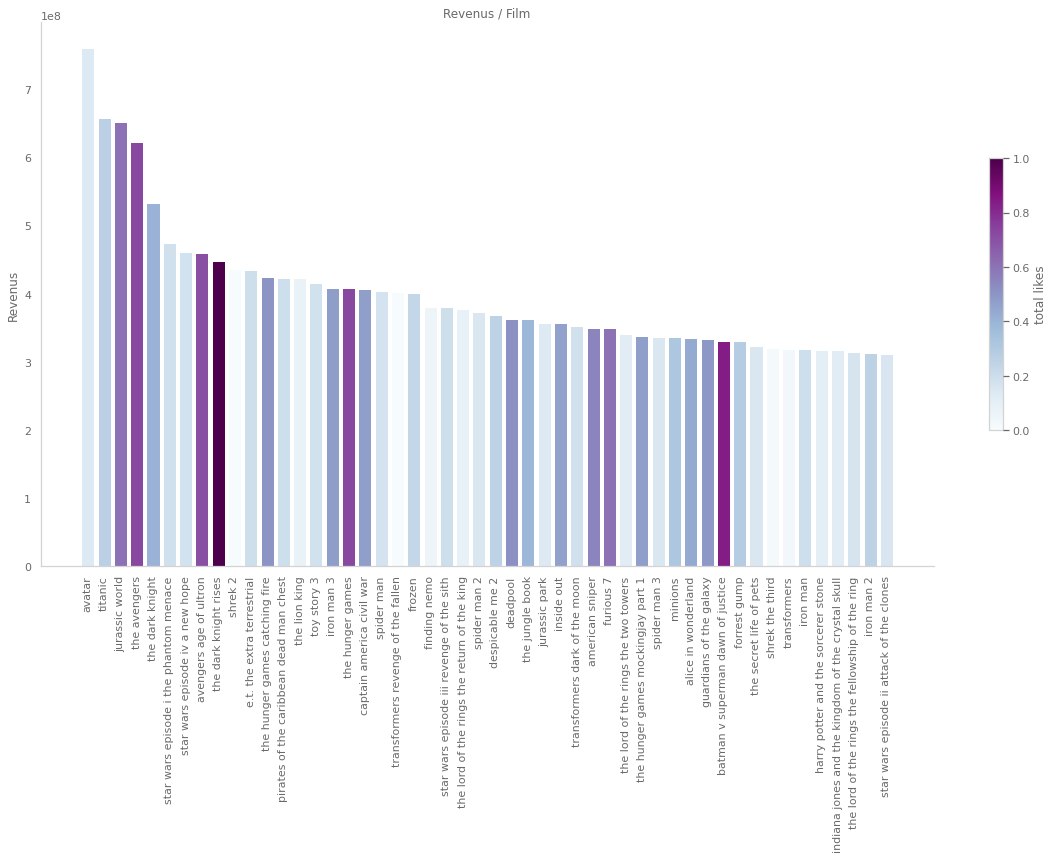

In [66]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Revenus / Film')
plt.ylabel('Revenus')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('BuPu')

dfMoviesGross=dfMovies[['movie_title','gross','imdb_score','total_likes']].sort_values(by=['gross'],ascending=False).head(50)

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesGross['total_likes'].max())

plot=plt.bar(dfMoviesGross['movie_title'],dfMoviesGross['gross'].values,color=cmap(normalise(dfMoviesGross['total_likes'].values)))

plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="total likes",shrink=0.5, orientation='vertical')

plt.show()

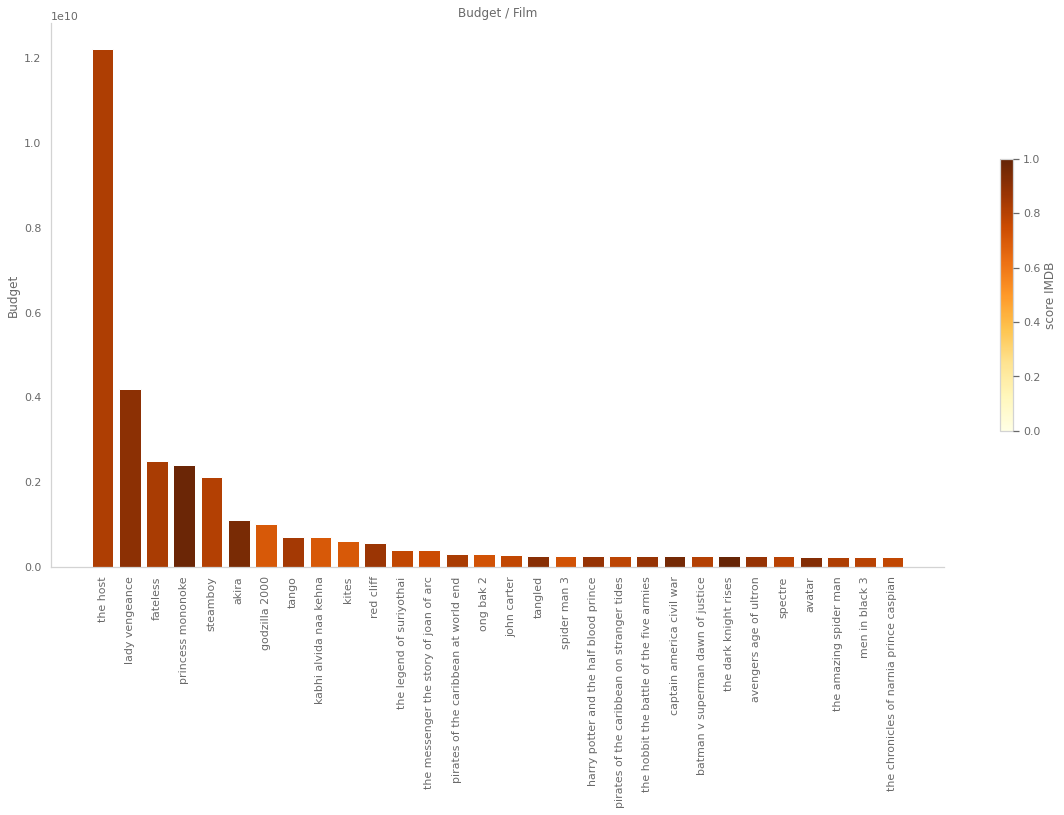

In [67]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Budget / Film')
plt.ylabel('Budget')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('YlOrBr')

dfMoviesBudget=dfMovies[['movie_title','budget','imdb_score']].sort_values(by=['budget'],ascending=False).head(30)

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesBudget['imdb_score'].max())

plot=plt.bar(dfMoviesBudget['movie_title'],dfMoviesBudget['budget'].values,color=cmap(normalise(dfMoviesBudget['imdb_score'].values)))

plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="score IMDB",shrink=0.5, orientation='vertical')

plt.show()

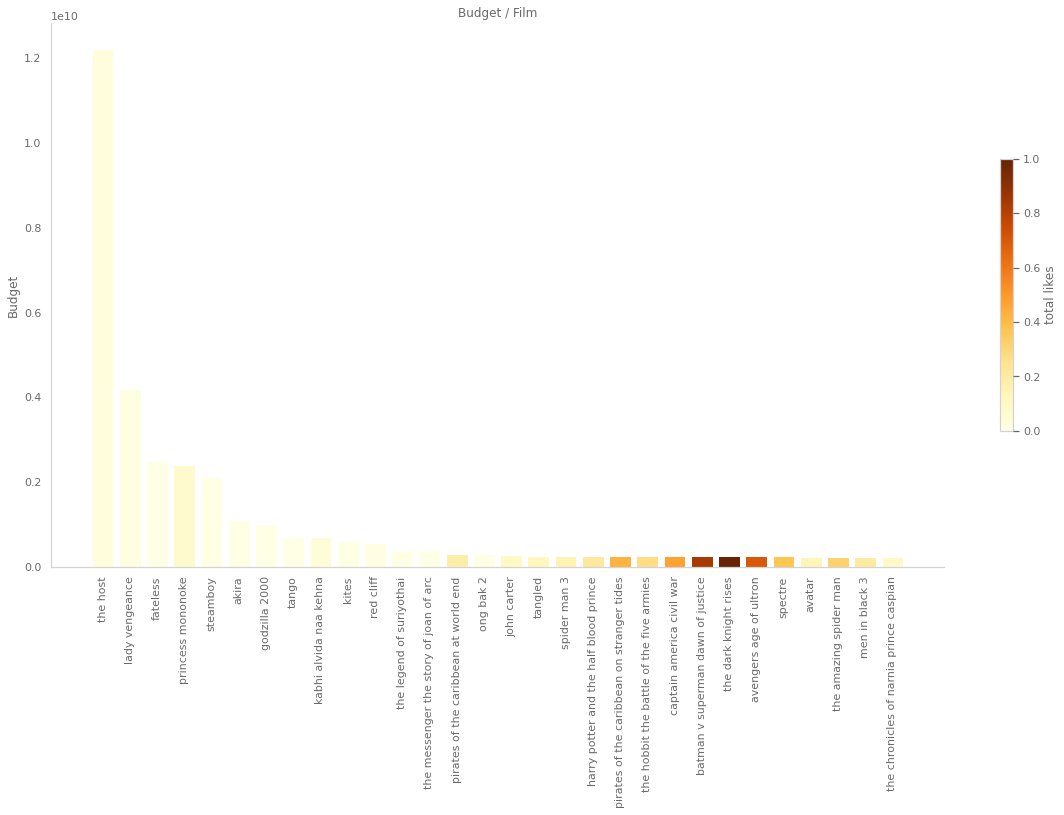

In [68]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Budget / Film')
plt.ylabel('Budget')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('YlOrBr')

dfMoviesBudget=dfMovies[['movie_title','budget','imdb_score','total_likes']].sort_values(by=['budget'],ascending=False).head(30)

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesBudget['total_likes'].max())

plot=plt.bar(dfMoviesBudget['movie_title'],dfMoviesBudget['budget'].values,color=cmap(normalise(dfMoviesBudget['total_likes'].values)))

plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="total likes",shrink=0.5, orientation='vertical')

plt.show()

#### <font color=#ffb703>Score imdb</font>

### <font color=#ffb703>NMF</font>

On essaie de découvrir par la méthode Non-Negative Matrix Factorization, les facteurs latents qui constituent les plots

On constate que certains films n'ont aucun plot, il faut donc les exclure de l'étude

In [69]:
# on masque les plots nuls sur toutes les colonnes
mask = (dfPlots == 0).all(axis=1)

In [70]:
del dfPlots['nan']
X=dfPlots[~mask]
X.shape

(3030, 83)

In [71]:
import numpy as np
from sklearn.decomposition import NMF

pd.set_option('display.max_columns', 30)

nbFacteurs=10

model = NMF(n_components=nbFacteurs, init='random', random_state=0)
W = model.fit_transform(X) # matrice de "weight (poids)" qui determine la contribution des films sur le facteur latent
H = model.components_ # la matrice de contribution du facteur à la variable plot

nX = np.dot(W, H) #on teste la matrice nX, predit par le produit pour verifier si on est proche de la matrice de départ

In [72]:
# la matrice de contribution des facteurs latents à la variable plot
dfH=pd.DataFrame(data=H,    # values
             index=range(nbFacteurs),    #  index
             columns=dfPlots.columns)
dfH

,soldier,critically_bashed,neighbor,dream,superhero,coach,princess,one_word_title,magic,baby,family_relationships,gangster,gay,bar,sheriff,...,prison,drugs,friendship,fbi,revenge,school,boy,alien,high_school,new_york_city,police,death,murder,friend,love
0,0.002757,0.005070,0.002132,0.000000,0.000000,0.000181,0.002001,0.002461,0.001605,0.006960,0.001662,0.000000,0.005175,0.001560,0.000444,...,0.000000,0.000830,0.047442,0.000000,0.000000,0.000000,0.006339,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.394523,0.000000
1,0.000000,0.005464,0.004358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020227,0.005314,0.007206,0.013966,...,0.010639,0.078428,0.000593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.625772,0.000000,0.000000,0.000000,0.000000
2,0.004941,0.000000,0.005666,0.014261,0.000035,0.005248,0.000000,0.000000,0.006667,0.005442,0.000000,0.000000,0.000000,0.005349,0.018209,...,0.000000,0.000000,0.000000,0.020890,0.000000,0.000000,0.001225,0.000000,0.000000,0.00000,0.000000,0.780972,0.000000,0.000000,0.000000
3,0.001997,0.014926,0.000000,0.000630,0.001241,0.000000,0.017863,0.000679,0.002177,0.032930,0.000000,0.000000,0.000000,0.013420,0.000000,...,0.026350,0.000000,0.000000,0.020710,0.000000,0.000000,0.000432,0.810204,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.018962,0.024319,0.000000,0.000000,0.012369,0.012001,0.011836,0.002529,0.012254,0.000000,0.003311,0.018536,0.000628,...,0.000000,0.010976,0.028685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.066417
5,0.046125,0.019313,0.005122,0.001889,0.015969,0.006308,0.000000,0.001254,0.002952,0.000000,0.000000,0.050087,0.000300,0.021755,0.054613,...,0.276763,0.001379,0.071011,0.041679,0.727516,0.001927,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.005309,0.000000,0.012980,0.020452,0.009772,0.015203,0.007150,0.000000,0.031089,0.049858,0.020840,0.000000,0.031527,0.000960,0.018726,...,0.000000,0.041800,0.000000,0.094922,0.000000,0.788446,0.563730,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000374,0.088455,0.000000,0.001559,0.000937,0.000000,0.018060,0.000000,0.048935,0.000000,0.016392,...,0.005061,0.017465,0.004546,0.000000,0.000000,0.022007,0.000000,0.000000,1.029169,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.032580,0.029304,0.021413,0.023616,0.000000,0.000000,0.025925,0.000000,0.020448,0.001090,0.017216,0.000000,0.000922,0.000000,...,0.000000,0.005040,0.069109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.55121,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.013852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008122,0.000000,0.000000,0.007814,0.001936,0.000000,0.006207,0.018933,...,0.000000,0.038110,0.000000,0.085791,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.203814,0.000000,0.000000


On essaie d'interpreter les facteurs latents\
Pour ce faire, on identifie les variables qui contribuent le plus en les triant par valeur de contribution

In [73]:
pd.options.display.max_rows=50
# variables qui contribuent le plus sur les facteurs latents
dfH.sum().sort_values(ascending=False).head(nbFacteurs+4)

new_york_city    1.551210
murder           1.203814
love             1.066417
high_school      1.029169
school           0.812380
alien            0.810204
death            0.780972
revenge          0.727516
police           0.625772
boy              0.571726
friend           0.394523
teacher          0.381502
student          0.325238
prison           0.318813
dtype: float64

Maintenant, nous allons chercher parmi ces variables  contributrices sur quelles composantes elles sont les plus determinantes

In [74]:
dfH[['police', 'fbi', 'boy', 'new_york_city', 'murder', 'marriage', 'love', 'high_school', 'alien', 'revenge', 'school', 'friendship', 'death', 'drugs', 'serial_killer', 'sex', 'detective', 'wedding', 'money', 'teacher']]

,police,fbi,boy,new_york_city,murder,marriage,love,high_school,alien,revenge,school,friendship,death,drugs,serial_killer,sex,detective,wedding,money,teacher
0,0.000000,0.000000,0.006339,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047442,0.000000,0.000830,0.000000,0.011553,0.000175,0.019849,0.004696,0.000000
1,0.625772,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000593,0.000000,0.078428,0.016974,0.002070,0.120921,0.001742,0.006618,0.000000
2,0.000000,0.020890,0.001225,0.00000,0.000000,0.001917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780972,0.000000,0.014766,0.010287,0.006456,0.000000,0.000000,0.000000
3,0.000000,0.020710,0.000432,0.00000,0.000000,0.000509,0.000000,0.000000,0.810204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015133,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.078592,1.066417,0.000000,0.000000,0.000000,0.000000,0.028685,0.000000,0.010976,0.000000,0.017861,0.008401,0.025367,0.008124,0.002495
5,0.000000,0.041679,0.000000,0.00000,0.000000,0.034508,0.000000,0.000000,0.000000,0.727516,0.001927,0.071011,0.000000,0.001379,0.000000,0.021137,0.003612,0.000948,0.244879,0.000000
6,0.000000,0.094922,0.563730,0.00000,0.000000,0.025018,0.000000,0.000000,0.000000,0.000000,0.788446,0.000000,0.000000,0.041800,0.040962,0.034651,0.007767,0.000000,0.002913,0.283527
7,0.000000,0.000000,0.000000,0.00000,0.000000,0.024937,0.000000,1.029169,0.000000,0.000000,0.022007,0.004546,0.000000,0.017465,0.000000,0.000000,0.000000,0.050781,0.000000,0.034582
8,0.000000,0.000000,0.000000,1.55121,0.000000,0.000469,0.000000,0.000000,0.000000,0.000000,0.000000,0.069109,0.000000,0.005040,0.035125,0.026308,0.024557,0.000000,0.000000,0.060898
9,0.000000,0.085791,0.000000,0.00000,1.203814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038110,0.114779,0.036178,0.027168,0.000000,0.000000,0.000000


Par exemple, on deduit que le facteur 4, correspond à au plot police puisque la variable police est la seule à contribuer dessus.
on peut utiliser dans Excel , la formule suivante: =EQUIV(RECHERCHE(2,1;1/(E2:E15<>"");E2:E15);E2:E15)
pour identifier les lignes correspondantes au facteur
Par analogie, on en deduit la correspondance suivante :
* 0 friend
* 1 police
* 2 death
* 3 alien
* 4 love
* 5 revenge
* 6 school
* 7 high_school
* 8 new_york_city
* 9 murder

et que tous les autres plots peuvent s'expliquer à partir de ces facteurs

In [75]:
pd.options.display.max_rows=10
dfW=pd.DataFrame(data=W,    # values
             index=dfMovies['movie_title'][~mask],    #  index
             columns=['friend','police','death','alien','love','revenge','school','high_school','new_york_city','murder'])
dfW

,friend,police,death,alien,love,revenge,school,high_school,new_york_city,murder
movie_title,,,,,,,,,,
avatar,0.000000,0.019288,0.000000,0.117070,0.000000,0.000000,0.000915,0.000000,0.000000,0.030754
spectre,0.000000,0.050056,0.034171,0.000000,0.000000,0.134406,0.000457,0.000000,0.042750,0.001287
star wars episode vii the force awakens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
john carter,0.001754,0.000000,0.000000,1.185603,0.007573,0.000000,0.000000,0.000000,0.000000,0.000000
avengers age of ultron,0.000000,0.000000,0.000000,0.000502,0.000000,0.020721,0.007862,0.000000,0.009127,0.000000
...,...,...,...,...,...,...,...,...,...,...
el mariachi,0.000000,0.004098,1.300508,0.000000,0.000000,0.004839,0.000000,0.027134,0.000000,0.000000
signed sealed delivered,0.000000,0.015257,0.000000,0.018193,0.000000,0.366216,0.000000,0.000054,0.000000,0.000000
the following,0.000000,0.033787,0.052642,0.023471,0.000000,0.047122,0.114815,0.000000,0.010481,0.132573


In [76]:
pd.options.display.max_colwidth = 100
dfMovies[dfMovies['movie_title'].str.contains("avatar")][["movie_title","plot_keywords","genres"]]

,movie_title,plot_keywords,genres
0,avatar,avatar future marine native paraplegic,action adventure fantasy sci_fi


In [77]:
dfW[dfW.index.str.contains('love')]

,friend,police,death,alien,love,revenge,school,high_school,new_york_city,murder
movie_title,,,,,,,,,,
eat pray love,0.000000,0.000000,0.006802,0.000062,0.002020,0.000000,0.000000,0.084124,0.013605,0.012605
from paris with love,0.000000,0.035413,0.033933,0.000000,0.000000,0.197998,0.000000,0.003020,0.033644,0.000900
"crazy, stupid, love.",2.532544,0.010402,0.023768,0.013772,0.007793,0.000000,0.051337,0.000000,0.000065,0.001303
love actually,0.000000,0.000000,0.010324,0.000000,0.009083,0.000000,0.033911,0.000000,0.024217,0.000000
love in the time of cholera,0.000000,0.000000,0.000000,0.000000,0.991563,0.028765,0.006560,0.012574,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
intolerance love struggle throughout the ages,0.120507,0.003332,0.000000,0.000000,0.021265,0.000000,0.000000,0.042423,0.000000,0.000000
"first love, last rites",0.067957,0.002580,0.014929,0.019230,0.014269,0.024623,0.028201,0.000000,0.009296,0.023425
lovely & amazing,0.048600,0.000000,0.000000,0.000000,0.006875,0.001526,0.048213,0.000000,0.027890,0.000000


Au final, la description des films par types de plots, depend beaucoup de la qualité de description des films au départ.

Par exemple: le film 'batman returns' a pour 'plot_keywords' :'box_office_hit dc_comics gotham mayor penguin'
Si on essaye de le decrire par les facteurs latents, on voit que le c'est un peu aleatoire (expliquée uniquement par le facteur "high_school")

### <font color=#ffb703>Regles d'association</font>

#### <font color=#ffb703>Genres</font>

On va 
* générer des groupes d'éléments fréquents qui ont une valeur de support d'au moins 2% (ce nombre est choisi pour que l'on puisse couvrir suffisamment de cas)
* Générez les règles avec leur support, leur confiance et leur lift correspondants.

In [78]:
from mlxtend.frequent_patterns import apriori, association_rules

groupesFrequents= apriori(dfGenres, min_support=0.02, use_colnames=True)
reglesGenres = association_rules(groupesFrequents, metric="lift", min_threshold=1)
reglesGenres.sort_values(by='lift',ascending=False).head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
185,"(adventure, comedy, family)",(animation),0.035983,0.048790,0.022566,0.627119,12.853319,0.020810,2.550971
196,(animation),"(adventure, comedy, family)",0.048790,0.035983,0.022566,0.462500,12.853319,0.020810,1.793520
191,"(comedy, animation)","(adventure, family)",0.034560,0.056922,0.022566,0.652941,11.470777,0.020598,2.717343
190,"(adventure, family)","(comedy, animation)",0.056922,0.034560,0.022566,0.396429,11.470777,0.020598,1.599546
109,"(adventure, family)",(animation),0.056922,0.048790,0.030291,0.532143,10.906711,0.027513,2.033120
...,...,...,...,...,...,...,...,...,...
163,(mystery),"(crime, thriller)",0.098597,0.107949,0.025412,0.257732,2.387540,0.014768,1.201791
16,(adventure),(sci_fi),0.180524,0.120960,0.051027,0.282658,2.336795,0.029190,1.225413
17,(sci_fi),(adventure),0.120960,0.180524,0.051027,0.421849,2.336795,0.029190,1.417407
122,"(comedy, fantasy)",(adventure),0.050010,0.180524,0.020939,0.418699,2.319348,0.011911,1.409727


In [79]:
# On filtrer pour une confiance relativement élevée (.6)
reglesGenres[ (reglesGenres['lift'] >= 7.5) &
      (reglesGenres['confidence'] >= 0.75) ].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,"(adventure, comedy, animation)",(family),0.024395,0.108559,0.022566,0.925000,8.520740,0.019917,11.885885
132,"(comedy, animation)",(family),0.034560,0.108559,0.030901,0.894118,8.236263,0.027149,8.419168
108,"(adventure, animation)",(family),0.033950,0.108559,0.030291,0.892216,8.218742,0.026605,8.270595
20,(animation),(family),0.048790,0.108559,0.041269,0.845833,7.791487,0.035972,5.782322


Lorsque les films sont de type antecedent, alors il sont égalements de type consequents

#### <font color=#ffb703>Scores et likes</font>

#### Relation entre score et likes?

In [80]:
dfScoresLikes=dfMovies[["director_facebook_likes","actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes","movie_facebook_likes","imdb_score"]].dropna()
matriceCorrelation=dfScoresLikes.corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,movie_facebook_likes,imdb_score
director_facebook_likes,1.00,0.09,0.12,0.12,0.17,0.17
actor_1_facebook_likes,0.09,1.00,0.39,0.25,0.13,0.09
actor_2_facebook_likes,0.12,0.39,1.00,0.55,0.24,0.09
actor_3_facebook_likes,0.12,0.25,0.55,1.00,0.27,0.06
movie_facebook_likes,0.17,0.13,0.24,0.27,1.00,0.26
imdb_score,0.17,0.09,0.09,0.06,0.26,1.00


On ne constate pas de correlation apparente

In [81]:
dfScoresLikes.describe()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,movie_facebook_likes,imdb_score
count,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000
mean,693.306650,6612.644986,1647.730873,636.944757,7427.601834,6.412383
std,2837.694962,15251.925062,4051.151333,1641.188695,19360.674503,1.118394
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000
25%,7.000000,614.000000,279.000000,131.000000,0.000000,5.800000
50%,48.000000,989.000000,595.000000,367.000000,161.000000,6.500000
75%,192.000000,11000.000000,919.000000,636.000000,2000.000000,7.200000
max,23000.000000,640000.000000,137000.000000,23000.000000,349000.000000,9.500000


Pour la suite, on encode les valeurs du 3e quartile pour reperer les films les mieux notés/scorés.

In [82]:
for c in dfScoresLikes.columns:
    dfScoresLikes[c]=dfScoresLikes[c].apply(lambda x: 1 if (x >=  dfScoresLikes[c].quantile(.75)) else 0)

In [83]:
dfScoresLikes.head()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,movie_facebook_likes,imdb_score
0,0,0,1,1,1,1
1,1,1,1,1,0,0
2,0,1,0,0,1,0
3,1,1,1,1,1,1
5,1,0,0,0,1,0


In [84]:
from mlxtend.frequent_patterns import apriori, association_rules

groupesFrequents= apriori(dfScoresLikes, min_support=0.02, use_colnames=True)
reglesLikes = association_rules(groupesFrequents, metric="lift", min_threshold=1)
reglesLikes.sort_values(by='lift',ascending=False).head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
389,"(imdb_score, actor_2_facebook_likes)","(actor_3_facebook_likes, actor_1_facebook_likes, movie_facebook_likes)",0.068376,0.063790,0.026266,0.384146,6.022059,0.021905,1.520183
388,"(actor_3_facebook_likes, actor_1_facebook_likes, movie_facebook_likes)","(imdb_score, actor_2_facebook_likes)",0.063790,0.068376,0.026266,0.411765,6.022059,0.021905,1.583761
395,"(movie_facebook_likes, actor_2_facebook_likes)","(actor_3_facebook_likes, actor_1_facebook_likes, imdb_score)",0.104440,0.043777,0.026266,0.251497,5.744910,0.021694,1.277513
382,"(actor_3_facebook_likes, actor_1_facebook_likes, imdb_score)","(movie_facebook_likes, actor_2_facebook_likes)",0.043777,0.104440,0.026266,0.600000,5.744910,0.021694,2.238899
355,"(actor_3_facebook_likes, actor_1_facebook_likes, director_facebook_likes)","(movie_facebook_likes, actor_2_facebook_likes)",0.049823,0.104440,0.027517,0.552301,5.288202,0.022314,2.000362
...,...,...,...,...,...,...,...,...,...
330,"(actor_3_facebook_likes, imdb_score, movie_facebook_likes)",(actor_2_facebook_likes),0.041693,0.250156,0.033146,0.795000,3.178013,0.022716,3.657774
129,(actor_2_facebook_likes),"(actor_3_facebook_likes, movie_facebook_likes)",0.250156,0.095268,0.075047,0.300000,3.149015,0.051215,1.292474
124,"(actor_3_facebook_likes, movie_facebook_likes)",(actor_2_facebook_likes),0.095268,0.250156,0.075047,0.787746,3.149015,0.051215,3.532769
212,"(actor_1_facebook_likes, director_facebook_likes)","(actor_3_facebook_likes, imdb_score)",0.099646,0.064624,0.020221,0.202929,3.140161,0.013782,1.173517


In [85]:
pd.options.display.max_rows=50
# On filtrer pour une confiance relativement élevée (.6)
reglesLikes[ (reglesLikes['lift'] >= 3) &
      (reglesLikes['confidence'] > 0.9) ].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
348,"(actor_3_facebook_likes, actor_1_facebook_likes, director_facebook_likes, movie_facebook_likes)",(actor_2_facebook_likes),0.029602,0.250156,0.027517,0.929577,3.715986,0.020112,10.64778
274,"(actor_3_facebook_likes, actor_1_facebook_likes, movie_facebook_likes)",(actor_2_facebook_likes),0.063790,0.250156,0.057953,0.908497,3.631716,0.041995,8.19472


quand les likes sur les acteurs 1 et 3 sont elevés , les likes sur l'acteur 2 sont également élevés

#### <font color=#ffb703>Scores et budget</font>

In [86]:
dfScoresGrossBudget=dfMovies[["gross","budget","imdb_score"]].dropna()

In [87]:
dfScoresGrossBudget.describe()

,gross,budget,imdb_score
count,3.790000e+03,3.790000e+03,3790.000000
mean,5.019224e+07,4.472383e+07,6.461689
std,6.872024e+07,2.250798e+08,1.057649
min,1.620000e+02,2.180000e+02,1.600000
25%,6.534417e+06,9.525000e+06,5.900000
50%,2.717721e+07,2.400000e+07,6.600000
75%,6.495038e+07,5.000000e+07,7.200000
max,7.605058e+08,1.221550e+10,9.300000


On encode les valeurs du 3e quartile.\
Pour reperer les films les mieux notés et ayant les plus gros budget/revenus.

In [88]:
for c in dfScoresGrossBudget.columns:
    dfScoresGrossBudget[c]=dfScoresGrossBudget[c].apply(lambda x: 1 if (x >=  dfScoresGrossBudget[c].quantile(.75)) else 0)

In [89]:
from mlxtend.frequent_patterns import apriori, association_rules

groupesFrequents= apriori(dfScoresGrossBudget, min_support=0.02, use_colnames=True)
regles = association_rules(groupesFrequents, metric="lift", min_threshold=1)
regles.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(gross),(budget),0.250132,0.262533,0.151187,0.604430,2.302303,0.085519,1.864317
1,(budget),(gross),0.262533,0.250132,0.151187,0.575879,2.302303,0.085519,1.768054
2,(gross),(imdb_score),0.250132,0.266755,0.091293,0.364979,1.368220,0.024569,1.154679
3,(imdb_score),(gross),0.266755,0.250132,0.091293,0.342235,1.368220,0.024569,1.140025
4,"(gross, imdb_score)",(budget),0.091293,0.262533,0.048285,0.528902,2.014611,0.024318,1.565421
5,"(gross, budget)",(imdb_score),0.151187,0.266755,0.048285,0.319372,1.197249,0.007955,1.077307
6,"(imdb_score, budget)",(gross),0.064380,0.250132,0.048285,0.750000,2.998418,0.032181,2.999472
7,(gross),"(imdb_score, budget)",0.250132,0.064380,0.048285,0.193038,2.998418,0.032181,1.159435
8,(imdb_score),"(gross, budget)",0.266755,0.151187,0.048285,0.181009,1.197249,0.007955,1.036413
9,(budget),"(gross, imdb_score)",0.262533,0.091293,0.048285,0.183920,2.014611,0.024318,1.113502


In [90]:
pd.options.display.max_rows=50
# On filtrer pour une confiance relativement élevée (.6)
regles[ (regles['lift'] >= 2) &
      (regles['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(imdb_score, budget)",(gross),0.06438,0.250132,0.048285,0.75,2.998418,0.032181,2.999472


Lorsque le score imdb est elevée et que c'est un film à budget, le film rapporte du revenu

### <font color=#ffb703>Similarites</font>

#### Similarite cosinus

Soit A le vecteur film, B le vecteur genre/plot

$\displaystyle sim(A,B)=cos(θ)=\frac{A.B}{\|A\| \|B\|}$

Sur la base de la valeur du cosinus, qui varie entre -1 et 1, les films sont classés par ordre décroissant

In [91]:
import numpy as np

def similariteCosinus(A, B):
    AB=A.T.dot(B)
    ANorm=np.linalg.norm(A)
    BNorm=np.linalg.norm(B)
    
    #result=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
    result = AB/(ANorm * BNorm)
    return result

In [92]:
# calcul de similarité Cosinus entre 2 films par genre
A = np.array(dfGenres.iloc[1])
B = np.array(dfGenres.iloc[2])
similariteCosinus(A,B)

0.6666666666666667

In [93]:
def matriceSimilariteCosinus(A,B):
    num=np.dot(A,B.T)
    p1=np.array(np.sqrt(np.sum(A**2,axis=1)))[:,np.newaxis]
    p2=np.array(np.sqrt(np.sum(B**2,axis=1)))[np.newaxis,:]
    return num/(p1*p2)

In [94]:
# calcul de similarité entre l'ensemble des 4000 films suivant leurs genres
m=matriceSimilariteCosinus(dfGenres,dfGenres)
print(m)

[[1.         0.8660254  0.57735027 ... 0.         0.         0.        ]
 [0.8660254  1.         0.66666667 ... 0.         0.         0.        ]
 [0.57735027 0.66666667 1.         ... 0.33333333 0.         0.        ]
 ...
 [0.         0.         0.33333333 ... 1.         0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


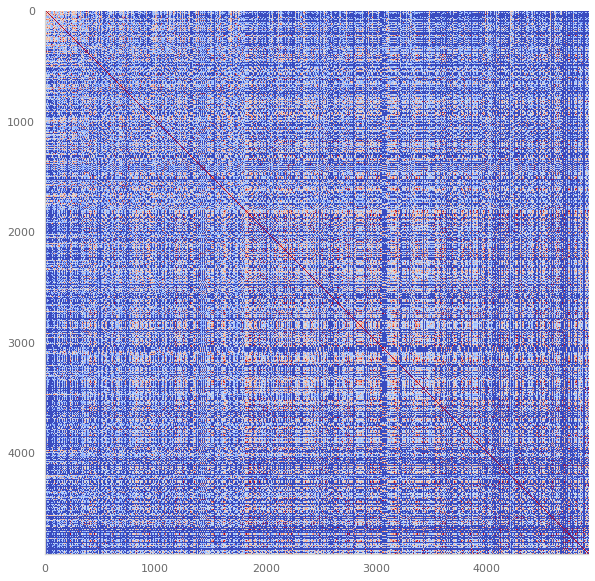

In [95]:
# Heatmap des similarités
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.imshow(m,cmap='coolwarm',interpolation='nearest')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


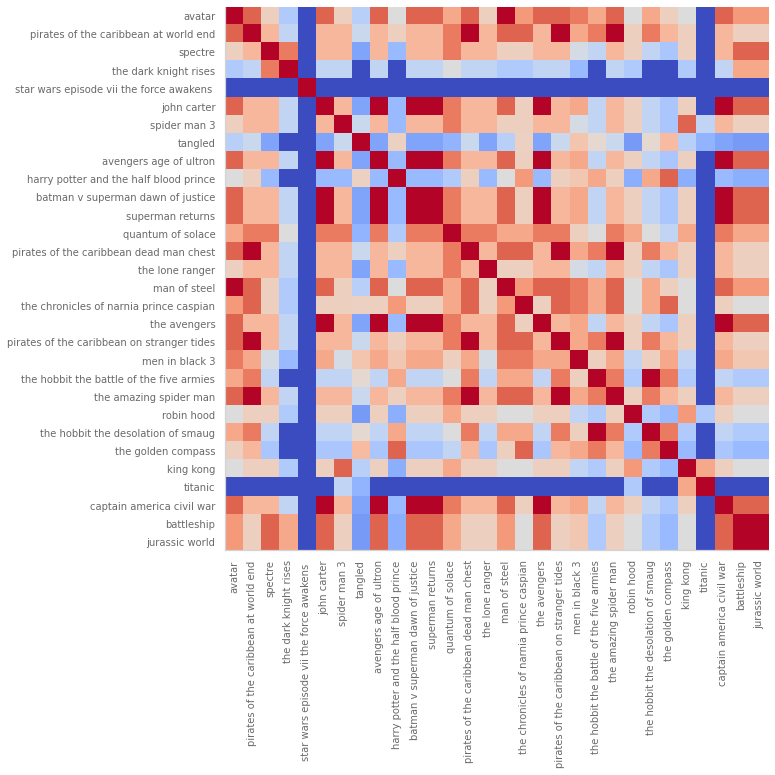

In [96]:
# Zoom Heatmap des similarités

plt.imshow(m[0:30,0:30],cmap='coolwarm',interpolation='nearest');
plt.xticks(range(30), dfMovies['movie_title'][0:30], size='small',rotation='vertical');
plt.yticks(range(30), dfMovies['movie_title'][0:30], size='small');

### <font color=#ffb703>KMeans</font>

#### Genres

In [97]:
X = dfGenres

In [98]:
#normalisation
from sklearn import preprocessing

X_normalise=preprocessing.scale(X)
print(X_normalise.shape)

(4919, 23)


In [99]:
import numpy as np

print(np.mean(X_normalise))
print(np.var(X_normalise))

1.4193646488927817e-17
1.0


Text(0.5, 1.0, 'silhouette / cluster')

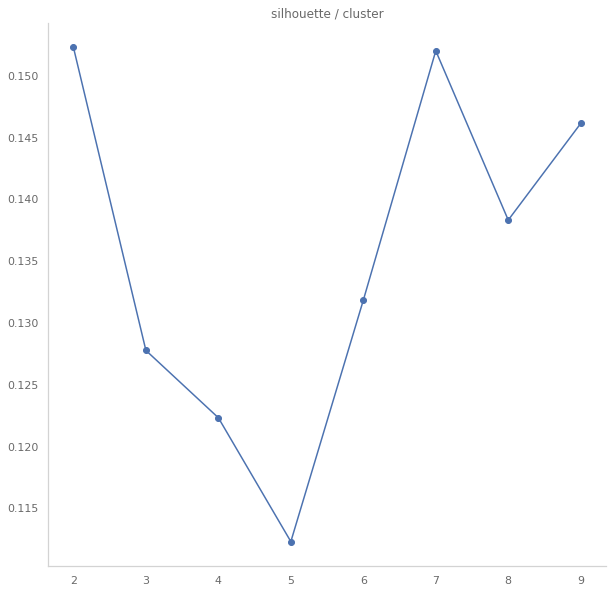

In [100]:
from sklearn import cluster, metrics
from matplotlib import pyplot as plt

silhouettes=[]
for n in range(2,10):
    c = cluster.KMeans(n_clusters=n,
                      n_init=1, init='random')# pour avoir une initialisation aleatoire et unique
    c.fit(X_normalise)# faire le clustering sur les données normalisée et calculer le coefficient de silhouette
    silhouette=metrics.silhouette_score(X_normalise,c.labels_)
    silhouettes.append(silhouette)

plt.plot(range(2,10), silhouettes, marker='o')
plt.title('silhouette / cluster')

In [101]:
# pour projeter les donnees sur 2 dimensions
from sklearn import decomposition
pca=decomposition.PCA(n_components=23)
pca.fit(X_normalise)
print(pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(X_normalise)

[0.1097717  0.2100037  0.28183074 0.33872022 0.39447666 0.44580867
 0.49341416 0.53842807 0.58216443 0.62582721 0.66911784 0.70776108
 0.74515249 0.78158244 0.8153635  0.84744685 0.87533696 0.90096173
 0.92561257 0.94615528 0.96560067 0.98456911 1.        ]


Text(0.5, 1.0, 'clusters=5')

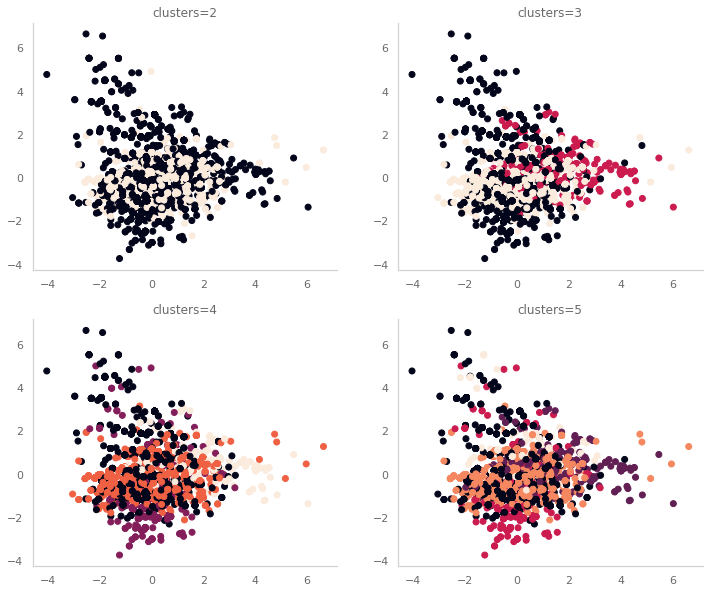

In [102]:
fig = plt.figure(figsize=(12,10))
# choix des plans factoriels
d1=4
d2=5

# separation en 2 clusters
c2=cluster.KMeans(n_clusters=2)
c2.fit(X_normalise)
ax=fig.add_subplot(221) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c2.labels_) # projection suivant la premiere et deuxieme composante
ax.set_title('clusters=2')

# séparation en 3 clusters
c3=cluster.KMeans(n_clusters=3)
c3.fit(X_normalise)
ax=fig.add_subplot(222) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c3.labels_) # projection suivant la premiere et deuxieme composante
ax.set_title('clusters=3')

# séparation en 4 clusters
c4=cluster.KMeans(n_clusters=4)
c4.fit(X_normalise)
ax=fig.add_subplot(223) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c4.labels_) # projection suivant la premiere et deuxieme composante
ax.set_title('clusters=4')

# séparation en 5 clusters
c5=cluster.KMeans(n_clusters=5)
c5.fit(X_normalise)
ax=fig.add_subplot(224) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c5.labels_) # projection suivant la premiere et deuxieme composante
ax.set_title('clusters=5')

On teste un affichage alternatif pour voir si on voit plus de choses

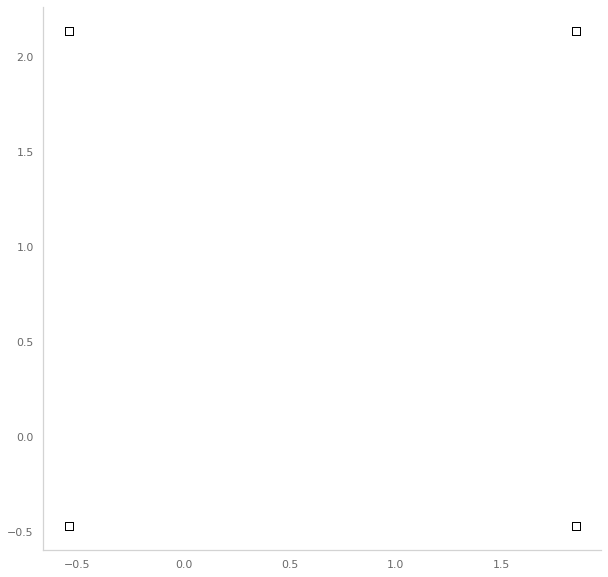

In [103]:
plt.scatter(
    X_normalise[:, 0], X_normalise[:, 1],
    s=50, c='white',
    marker='s', edgecolor='black',
    label='individus'
)

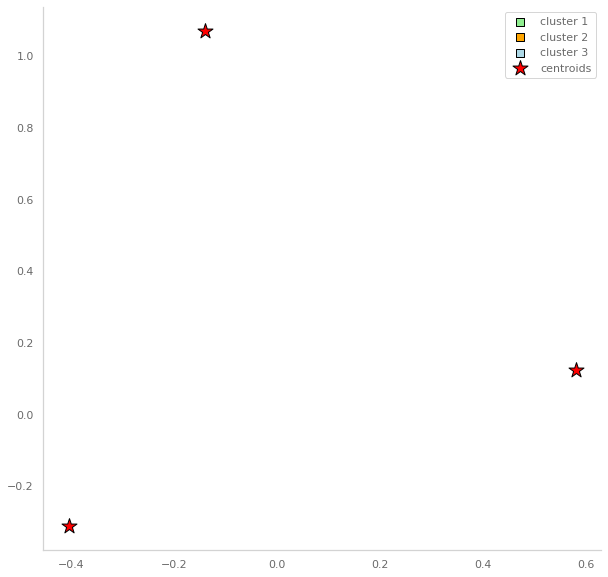

In [104]:
# affichage des centroides
plt.scatter(
    X_normalise[c3 == 0, 0], X_normalise[c3 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_normalise[c3 == 1, 0], X_normalise[c3 == 1, 1],
    s=50, c='orange',
    marker='s', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_normalise[c3 == 2, 0], X_normalise[c3 == 2, 1],
    s=50, c='lightblue',
    marker='s', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    c3.cluster_centers_[:, 0], c3.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)

plt.show()

La méthode du coude est l'une des méthodes les plus populaires utilisées pour sélectionner le nombre optimal de clusters en ajustant le modèle avec une plage de valeurs pour K dans l'algorithme K-means.\
La méthode du coude nécessite de tracer un tracé linéaire entre SSE (somme des erreurs au carré) et le nombre de clusters et de trouver le point représentant le «point du coude» (le point après lequel l'ESS ou l'inertie commence à diminuer de manière linéaire).

In [105]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
    
#  liste qui contient les valeurs SSE Sum of Squared Error (courbe d'inertie) pour chaque k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_normalise)
    sse.append(kmeans.inertia_)

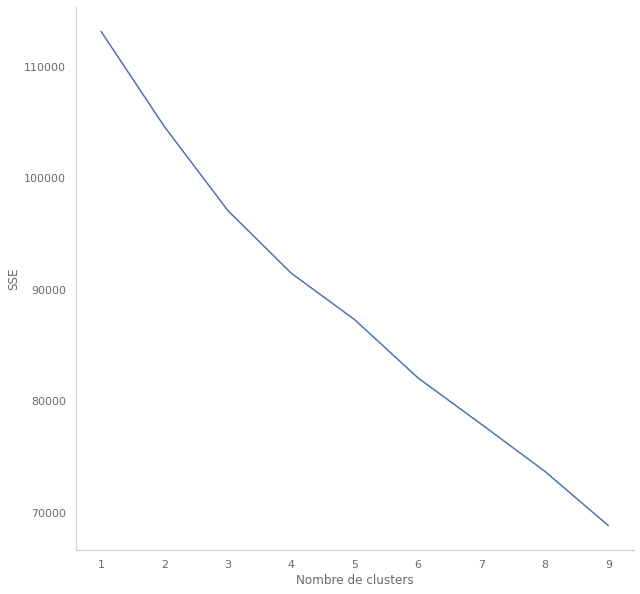

In [106]:
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Nombre de clusters")
plt.ylabel("SSE")
plt.show()

### <font color=#ffb703>DBSCAN</font>

L'algorithme DBSCAN utilise 2 paramètres : la distance ε et le nombre minimum de points MinPts

MinPts devant se trouver dans un rayon ε pour que ces points soient considérés comme un cluster
Cherchons les meilleurs parametres de clustering DBSCAN

In [107]:
from itertools import product

eps_values = np.arange(3,10,1) # valeurs de eps a tester
min_samples = np.arange(3,10) # valeurs de min_samples a tester
DBSCAN_params = list(product(eps_values, min_samples))

In [108]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

nb_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_normalise)
    nb_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_normalise, DBS_clustering.labels_))

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


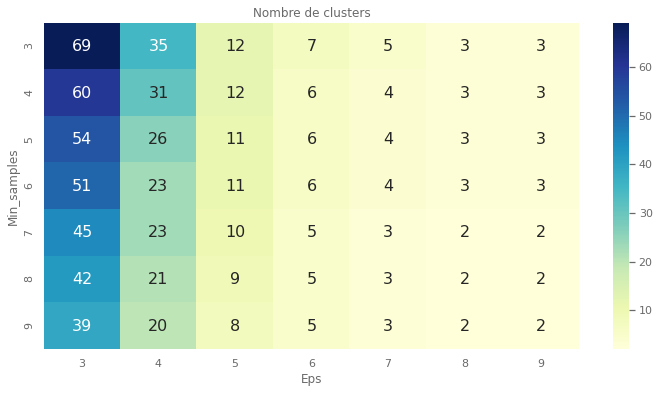

In [109]:
import seaborn as sns

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Nb_clusters'] = nb_clusters

pivot_1 = pd.pivot_table(tmp, values='Nb_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Nombre de clusters')
plt.show()

In [110]:
DBS_clustering = DBSCAN(eps=5, min_samples=5).fit(X_normalise)

DBSCAN_clustered = pd.DataFrame(data=X_normalise.copy(),columns=dfGenres.columns,index=dfMovies['movie_title'])
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # ajoute les labels de clusters sur les points

In [111]:
# Repartition par cluster
DBSCAN_clustered["Cluster"].value_counts()

 0    4226
 4     172
 5     159
 2     123
 1     100
 3      82
-1      26
 7       9
 8       8
 6       8
 9       6
Name: Cluster, dtype: int64

On a 10 clusters avec\
une majorité dans le cluster 0

In [112]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

In [113]:
temp=DBSCAN_clustered[DBSCAN_clustered['Cluster']==8]
temp.loc[ : , temp.columns != "Cluster"].sum().sort_values(ascending=False)

documentary    50.376434
history        38.658700
biography      10.710087
music           8.150628
crime           1.538363
short          -0.255186
film_noir      -0.279571
western        -1.116620
musical        -1.323270
sport          -1.545596
war            -1.689411
animation      -1.811837
mystery        -2.645837
thriller       -2.721556
family         -2.791745
horror         -2.809308
fantasy        -2.933456
sci_fi         -2.967602
adventure      -3.754828
romance        -4.253260
action         -4.326166
comedy         -6.205847
drama          -6.248523
dtype: float64

In [114]:
for c in range(len(DBSCAN_clustered["Cluster"].value_counts())):
    cCluster=DBSCAN_clustered[DBSCAN_clustered['Cluster']==c]
    print(f"Cluster {c} -> {cCluster.loc[ : , cCluster.columns != 'Cluster'].sum().sort_values(ascending=False).head(1)}")

#DBSCAN_clustered[DBSCAN_clustered['Cluster']==2]

Cluster 0 -> thriller    319.802595
dtype: float64
Cluster 1 -> documentary    629.705428
dtype: float64
Cluster 2 -> musical    743.612248
dtype: float64
Cluster 3 -> western    587.487438
dtype: float64
Cluster 4 -> history    831.16204
dtype: float64
Cluster 5 -> sport    822.983761
dtype: float64
Cluster 6 -> sport    41.407988
dtype: float64
Cluster 7 -> documentary    56.673488
dtype: float64
Cluster 8 -> documentary    50.376434
dtype: float64
Cluster 9 -> film_noir    171.691584
dtype: float64
Cluster 10 -> action    0.0
dtype: float64


In [115]:
#DBSCAN_clustered[DBSCAN_clustered['Cluster']==2].sum().sort_values(ascending=False).head(1)
DBSCAN_clustered[DBSCAN_clustered['Cluster']==5]

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,history,horror,music,musical,mystery,romance,sci_fi,short,sport,thriller,war,western,Cluster
movie_title,,,,,,,,,,,,,,,,,,,,,,,,
cars 2,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
turbo,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
speed racer,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
real steel,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,2.695779,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
ali,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
point break,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,1.614405,-0.211176,-0.139577,5
surf up,-0.540771,-0.469354,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
cinderella man,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
the longest yard,-0.540771,-0.469354,-0.226480,-0.250755,1.289107,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5


In [116]:
dfMovies[dfMovies["movie_title"].str.contains("hulk")]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,total_likes
166,ang lee,267.0,138.0,0.0,258.0,regi davis,820.0,132122995.0,action sci_fi,kevin rankin,hulk,212106,celia weston,0.0,1980s c_130_hercules monster panzer san_francisco_california,1445.0,137000000.0,2003.0,300.0,5.7,0,1378.0
175,louis leterrier,354.0,135.0,255.0,882.0,peter mensah,3000.0,134518390.0,action adventure sci_fi,ty burrell,the incredible hulk,326286,william hurt,0.0,antidote cure hulk marvel_cinematic_universe opening_action_scene,643.0,150000000.0,2008.0,1000.0,6.8,0,5137.0


In [117]:
#DBSCAN_clustered[DBSCAN_clustered['Cluster']==5].sum().sort_values(ascending=False)
DBSCAN_clustered[DBSCAN_clustered['Cluster']==5]

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,history,horror,music,musical,mystery,romance,sci_fi,short,sport,thriller,war,western,Cluster
movie_title,,,,,,,,,,,,,,,,,,,,,,,,
cars 2,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
turbo,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
speed racer,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
real steel,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,2.695779,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
ali,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
point break,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,1.614405,-0.211176,-0.139577,5
surf up,-0.540771,-0.469354,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
cinderella man,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
the longest yard,-0.540771,-0.469354,-0.226480,-0.250755,1.289107,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5


Estimated number of clusters: 10
Estimated number of noise points: 26
Silhouette Coefficient: 0.005
k:0 - col:(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
k:1 - col:(0.8310649750096117, 0.23844675124951936, 0.30880430603613995, 1.0)
k:2 - col:(0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0)
k:3 - col:(0.9914648212226067, 0.677354863514033, 0.37808535178777386, 1.0)
k:4 - col:(0.996078431372549, 0.8784313725490196, 0.5450980392156862, 1.0)
k:5 - col:(0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)
k:6 - col:(0.9019607843137256, 0.9607843137254902, 0.5960784313725491, 1.0)
k:7 - col:(0.6652825836216842, 0.8645905420991927, 0.6432141484044599, 1.0)
k:8 - col:(0.4, 0.7607843137254902, 0.6470588235294118, 1.0)
k:9 - col:(0.19946174548250672, 0.5289504036908881, 0.7391003460207612, 1.0)
k:-1 - col:(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)


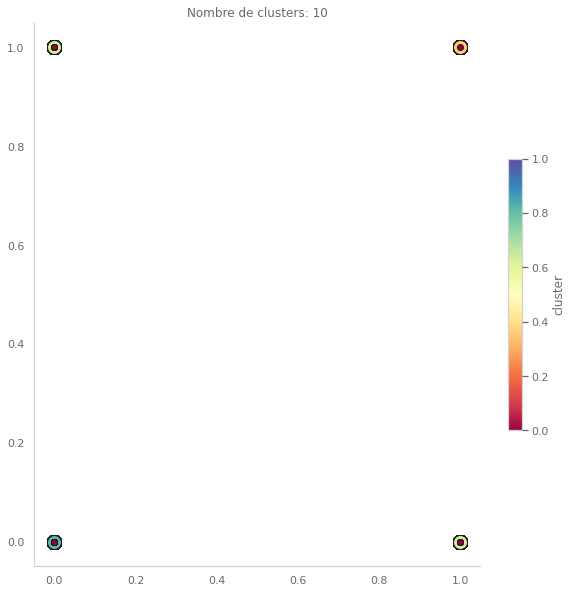

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

core_samples_mask = np.zeros_like(DBS_clustering.labels_, dtype=bool)
core_samples_mask[DBS_clustering.core_sample_indices_] = True
labels = DBS_clustering.labels_

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('Spectral')
# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=len(unique_labels))



n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#plot=plt.bar(dfMoviesBudget['movie_title'],dfMoviesBudget['budget'].values,color=cmap(normalise(dfMoviesBudget['imdb_score'].values)))


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))


for k, col in zip(unique_labels, colors):
    print(f"k:{k} - col:{tuple(col)}")
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
#    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=cmap(normalise(k)), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=cmap(normalise(k)),markeredgecolor='k', markersize=6)
    
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="cluster",shrink=0.5, orientation='vertical')

plt.title('Nombre de clusters: %d' % n_clusters_)
plt.show()

### <font color=#ffb703>ACP</font>

In [119]:
# filtrage sur les plots (8k variables)
dataPCA=dfGenres.dropna()
#dataPCA=dfGenres.iloc[:, 0:14].dropna()
nomsIndividus=dfGenres.index # Individus

variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [120]:
from sklearn import preprocessing

centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(4919, 23)

In [121]:
from sklearn import decomposition

nComposantes=22 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=nComposantes)
pca.fit(XCentreReduit)

PCA(n_components=22)

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


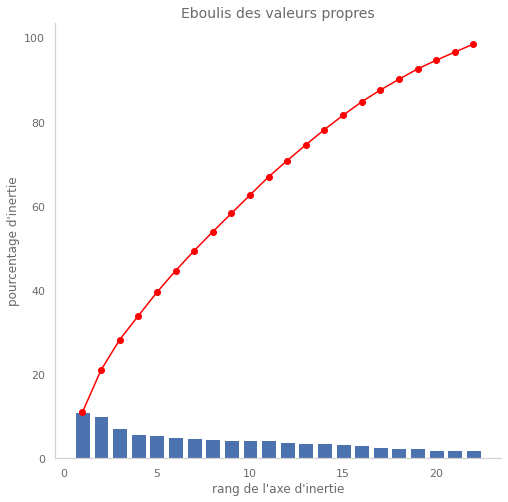

In [122]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

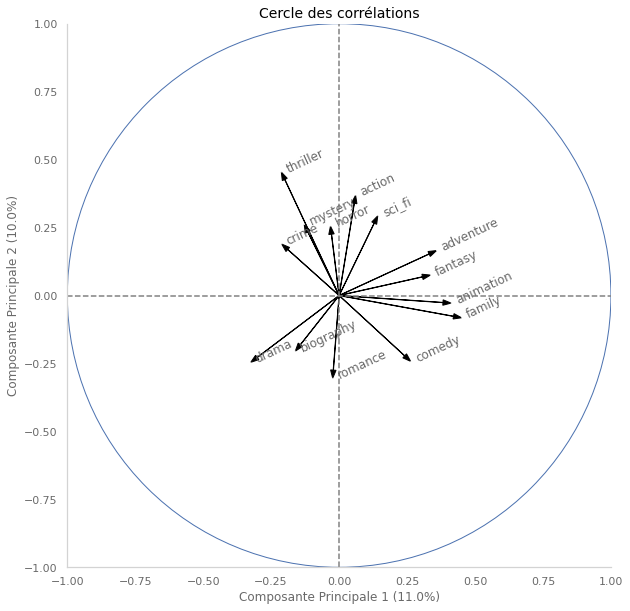

In [123]:
import numpy as np

composantesPrincipales = pca.components_ # triés par variance expliquée

# Selection du plan Factoriel
#dimension 1
d1=0
#dimension 2
d2=1

# taille du schema
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    p=np.array([composantesPrincipales[d1][i],composantesPrincipales[d2][i]])


    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>0.25:
        plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),rotation=25) 
        plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")
    
#import os
#os.system('say "jai fini de travailler"')    

L'analyse en composante principale sur plots n'est pas concluante: il y a beaucoup trop de composantes nécéssaires pour expliquer la variance totale

L'analyse en composante principale sur genres permet de dégager 3 grands genres de films, les thrillers/horreur, les romance/drama et les téléréalités

In [124]:
now=time.time()
now-start

83.50408911705017